## Authors: Pablo Mollá, Pavlo Poliuha and Junjie Chen

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Classification with gradient descent

### Exercise 1

The objective of this exercise is to build a simple linear classifier on a linearly separable problem. To this end we propose a toy dataset generated according to two gaussian (one class by gaussian).

In [18]:
np.random.seed(42)
dataset = list(zip(np.random.randn(50,2)*0.2 + [0.5, -0.5], np.ones(50))) \
               + list(zip(np.random.randn(50,2)*0.4 + [-0.5, 0.5], np.zeros(50)))
X, Y = np.array([x for (x, _) in dataset]), np.array([y for (_, y) in dataset]) 

In [3]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
print("Shape of X:", X.shape, "\nShape of Y:", Y.shape)

Shape of X: (100, 2) 
Shape of Y: (100,)


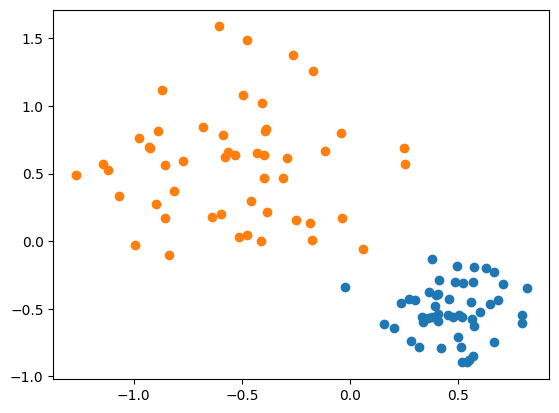

In [19]:
plt.scatter(X[Y==1][:, 0],X[Y==1][:, 1])
plt.scatter(X[Y==0][:, 0],X[Y==0][:, 1])

## 1. Linear Function and loss 
**Question 1**: Create an `affine` function that takes as parameters $w$ (2 dim vector), $b$ (scalars) and $x$ (2 dim vector) and returns: $$w^{\intercal}x  + b$$


In [20]:
def affine(w, b, x):
    return np.dot(w,x) + b

**Question 2:** Compute the equation of the line  such that $w^{\intercal}x  + b = 0$ and then draw it for $w_1 = 1$, $w_2 = 2$ and $b=1$. The function should return parameters $c$ and $d$ of $y = cx + d$

Procedure to compute the slope $c$:

1. **Understanding the Equation of the Line:**
   
   - We have the equation of the line in the form $w^{\intercal}x' + b = 0$. 
   
   - This equation represents a hyperplane in a multidimensional space. For simplicity, let's consider a 2D space with \(x\) and \(y\) coordinates.

2. **Representation of the Equation:**
   
   - In our 2D space and considering $x' = (x, y) \in \R^{2}$, the equation becomes $w_1x + w_2y + b = 0$. 
   
   - Here, $w_1$ and $w_2$ represent the coefficients of the weights and $x, y$ the coefficients of $x'$, respectively. These coefficients determine the slope of the line.

3. **Finding the Slope:**

   To find the slope of the line, we typically use the formula $m = \frac{\text{change in } y}{\text{change in } x}$. 
   
   However, in this case, we rearrange the equation to solve for $y$:
   
   $$ w_2y = -w_1x - b $$
   
   $$ \Longleftrightarrow y = -\frac{w_1}{w_2}x - \frac{b}{w_2} $$
   
   The term $-\frac{w_1}{w_2}$ represents the slope of the line. We use this term as $c$ in the equation $y = cx + d$. 
   
   The negative sign ensures that the line is perpendicular to the vector represented by $w$.

4. **Interpreting c:**

   - If $w_1$ is positive and $w_2$ is positive, then $-\frac{w_1}{w_2}$ will be negative, indicating that the line slopes downward from left to right.
   - If $w_1$ is negative and $w_2$ is negative, then $-\frac{w_1}{w_2}$ will be positive, indicating that the line slopes upward from left to right.


c = -0.5 , d = -0.5


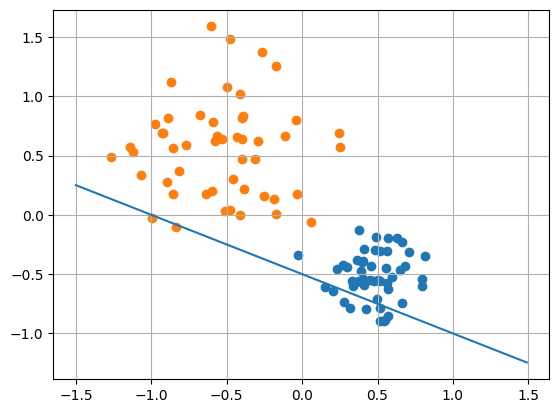

In [39]:
def line_param(w, b):
    w1, w2 = w
    c = -w1 / w2
    d = -b / w2
    return c, d

c, d = line_param([1, 2], 1)
print("c =", c, ", d =", d)

plt.scatter(X[Y==1][:, 0],X[Y==1][:, 1])
plt.scatter(X[Y==0][:, 0],X[Y==0][:, 1])
plt.grid()
rrange = np.arange(-1.5, 1.5, 0.01)
plt.plot(rrange, rrange * c + d)
plt.show()

**Question 3**: Create a function `affine_grad` taking as parameters $w$ (2 dim vector), $b$ (scalars) and $x$ (2 dim vector) returning the gradient w.r.t $w$ and $b$ : $$(\nabla_{w}[w^{\intercal}x  + b],\nabla_{b}[w^{\intercal}x  + b]) $$ 

In [24]:
def affine_grad(w, b, x):
    grad_w = x
    grad_b = 1
    return grad_w, grad_b

# Example usage
import numpy as np
w = [1, 2]
b = 3
x = [4, 5]

grad_w, grad_b = affine_grad(w, b, x)
print("Gradient with respect to w:", grad_w)
print("Gradient with respect to b:", grad_b)


Gradient with respect to w: [4, 5]
Gradient with respect to b: 1


## Hinge loss: forward and gradient
Create two functions that compute respectivelly the Hinge Loss and its derivative (in x) .

$$\text{Hinge loss} = \max(0, 1 - y \times x)$$

This is the formula of the hinge loss if $y\in \{-1,1\}.$

In [28]:
def hinge_loss(x, y):
    return max(0, 1 - y * x)

def hinge_loss_grad(x, y):
    if 1 - y * x > 0:
        return -y
    else:
        return 0


## 2. Gradient descent


Consider the function $f_{w, b}$ such that $f_{w, b}(x) = \max(0, 1 - y \times (w^{\intercal}x  + b))$. We want to train such function using SGD on parameters (w,b). 

**Question 1**: Complete the training loop below:


Nb: The variable `y_transformed` is the label converted from {0, 1} to {-1, 1} to properly calculate the hinge loss, which is designed for labels {-1, 1}.

The loss for the epoch 0 is 0.9767277143281156


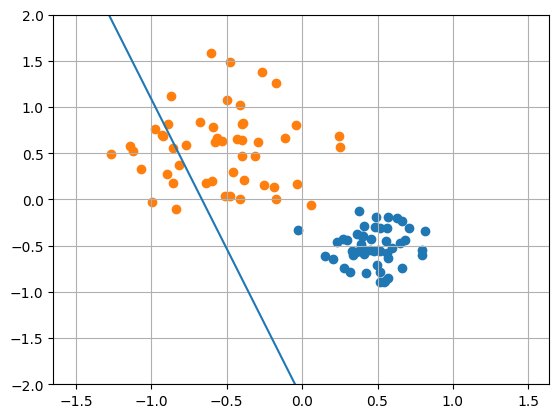

The loss for the epoch 1 is 0.9225269439658337


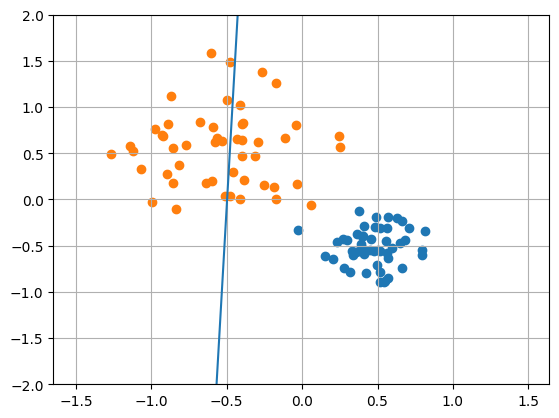

The loss for the epoch 2 is 0.8683261736035515


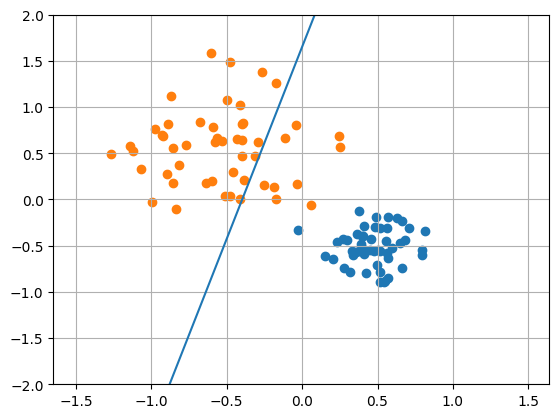

The loss for the epoch 3 is 0.814125403241269


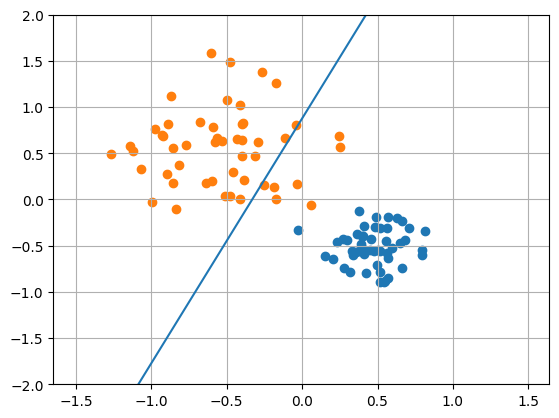

The loss for the epoch 4 is 0.7599246328789871


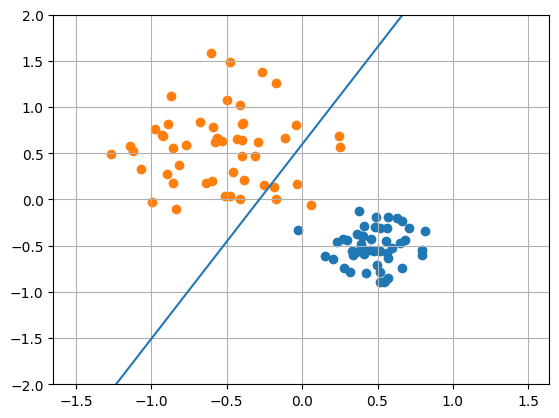

The loss for the epoch 5 is 0.7057238625167049


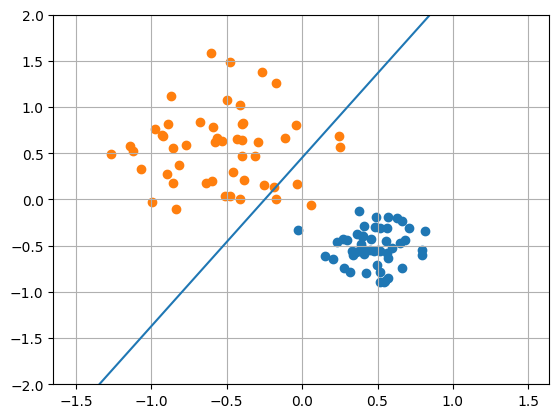

The loss for the epoch 6 is 0.6515230921544227


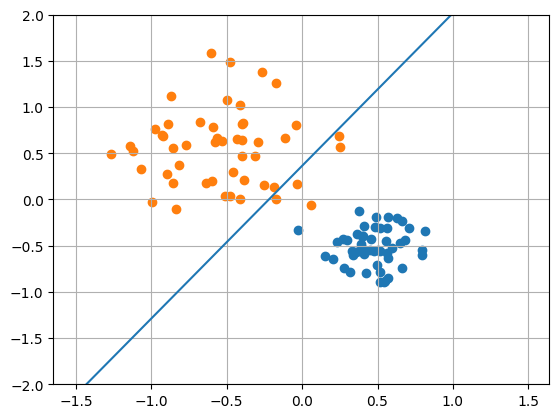

The loss for the epoch 7 is 0.5973223217921406


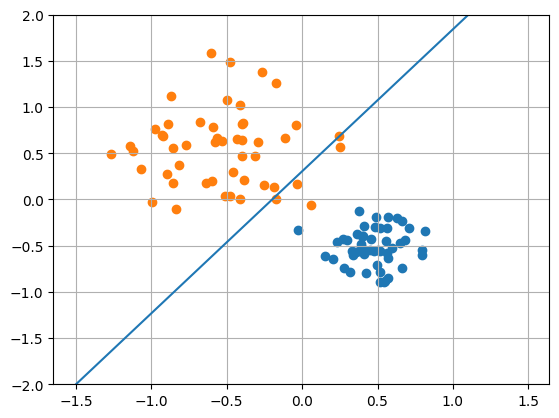

The loss for the epoch 8 is 0.5431215514298583


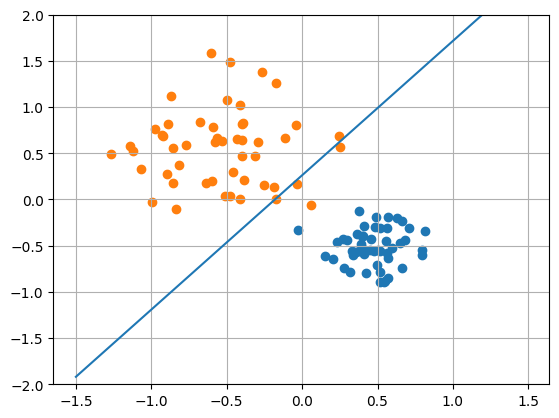

The loss for the epoch 9 is 0.4889207810675761


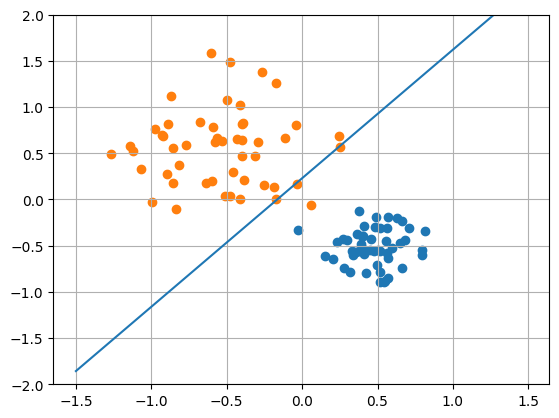

The loss for the epoch 10 is 0.43541748774785755


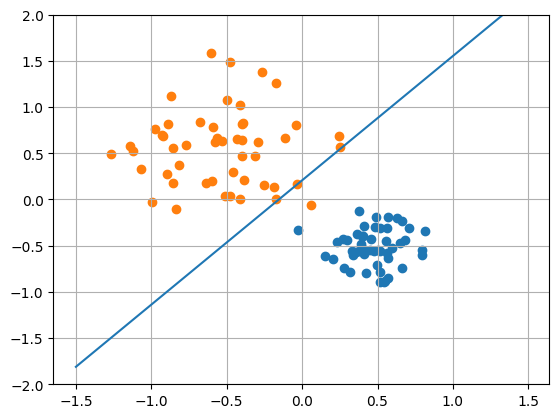

The loss for the epoch 11 is 0.38510366747519137


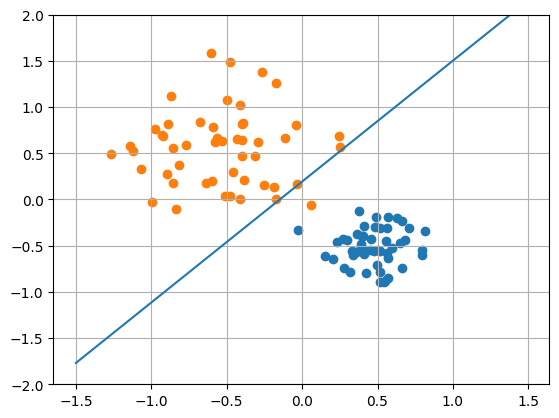

The loss for the epoch 12 is 0.3414070499509809


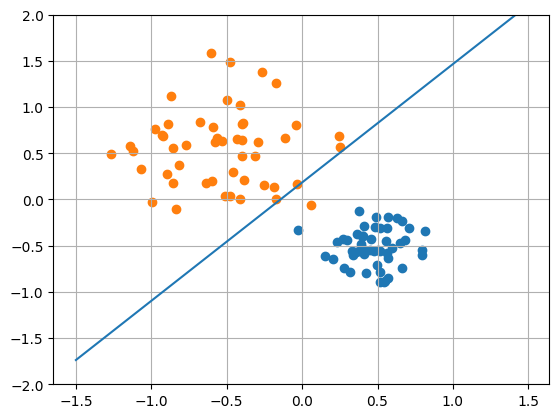

The loss for the epoch 13 is 0.30901479921531394


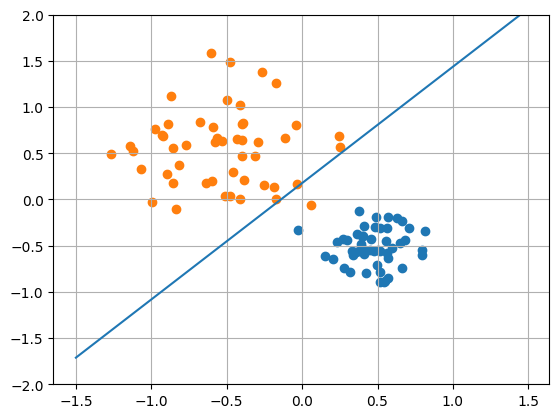

The loss for the epoch 14 is 0.28029685226363443


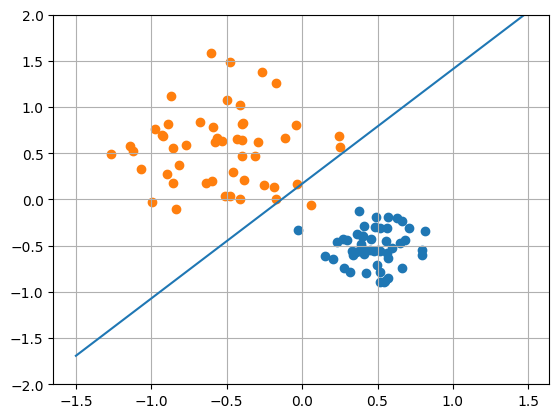

The loss for the epoch 15 is 0.2546040915662488


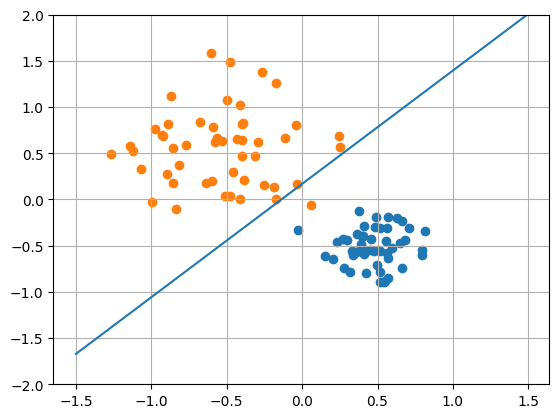

The loss for the epoch 16 is 0.2353120431361588


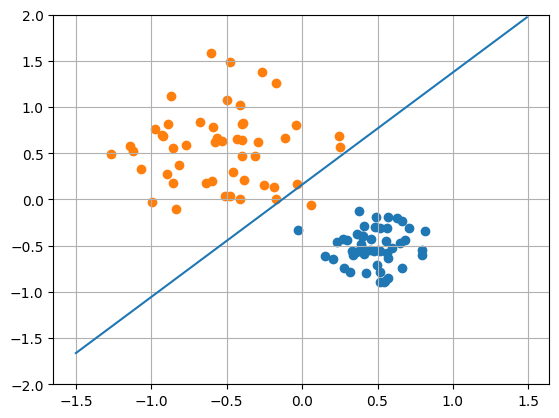

The loss for the epoch 17 is 0.21874358218680304


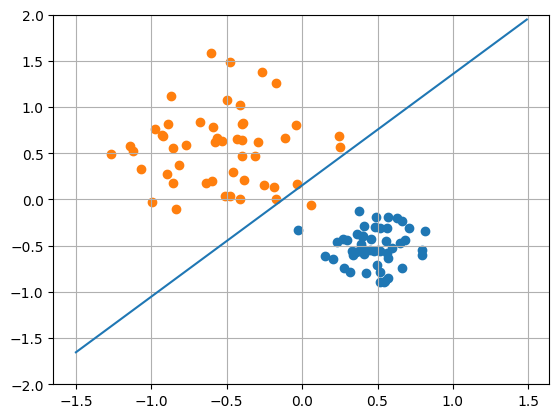

The loss for the epoch 18 is 0.20495483548970264


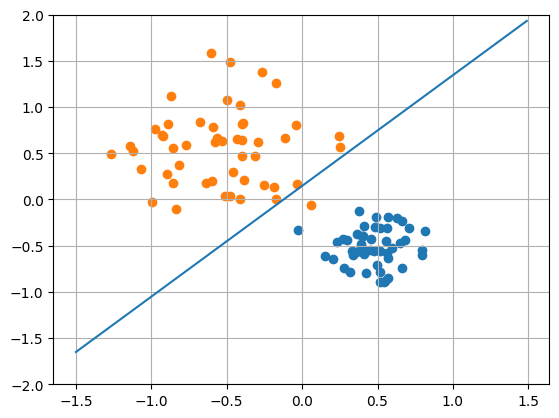

The loss for the epoch 19 is 0.19328134180720014


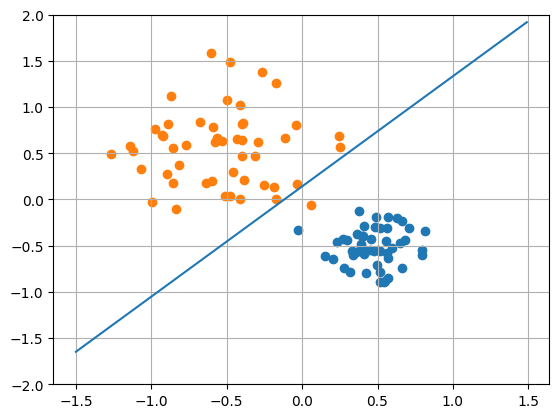

In [43]:
n_epoch = 20
w = [0.1, 0.1]
b = 0.1
learning_rate = 1e-3

for epoch in range(n_epoch):
    loss_values = []
    shuffled_index = np.arange(len(X))
    np.random.shuffle(shuffled_index)
    
    for i in shuffled_index:
        # Random point
        x, y = X[i], Y[i]

        # Compute predicted output using affine transformation
        o_pred = affine(w, b, x)
        
        # Convert label y from {0, 1} to {-1, 1} for hinge loss calculation
        y_transformed = 2 * y - 1

        # Compute loss using the hinge_loss function
        loss = hinge_loss(o_pred, y_transformed)
        
        loss_values.append(loss)
        
        # Compute the derivative of the hinge loss with respect to the predicted output
        loss_grad = hinge_loss_grad(o_pred, y_transformed)
        
        # Compute gradients of w and b using the affine_grad function
        grad_w_affine, grad_b_affine = affine_grad(w, b, x)

        # Update gradients based on the loss gradient
        w_grad = grad_w_affine * loss_grad
        b_grad = grad_b_affine * loss_grad

        # Update w and b according to the gradients
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
    
    print(f'The loss for the epoch {epoch} is {np.mean(loss_values)}')
    loss_values = []

    c, d = line_param(w, b)
    
    plt.scatter(X[Y==1][:, 0],X[Y==1][:, 1])
    plt.scatter(X[Y==0][:, 0],X[Y==0][:, 1])
    plt.grid()
    rrange = np.arange(-1.5, 1.5, 0.01)
    plt.plot(rrange, rrange * c + d)
    plt.ylim([-2, 2])
    
    plt.show()

**Question 2** Compute the final accuracy (number of correct classification on number of data points)

In [44]:
correct_predictions = 0
for i in range(len(X)):
    x, y = X[i], Y[i]
    
    # Compute the predicted class
    o_pred = np.dot(w, x) + b
    predicted_class = 1 if o_pred >= 0 else 0
    
    # Check if the prediction is correct
    if predicted_class == y:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / len(X)

print(f"Final accuracy: {accuracy * 100:.2f}%")

Final accuracy: 99.00%


**Question 3** With minimal changes (hyper-parameters) can you improve accuracy? If yes, apply those changes.

Improving the model accuracy may involve tuning several hyperparameters. For a linear model with hinge loss trained via SGD, the primary hyperparameters to consider are:

- `Learning rate`: Adjusting the learning rate can have a significant impact on convergence. A higher learning rate may lead to faster convergence but can overshoot the minimum, while a lower learning rate might converge too slowly or get stuck in a local minimum.

- `Number of epochs`: Increasing the number of training epochs allows the model more iterations to learn from the data, but too many epochs might lead to overfitting if the model is too complex.

- `Initialization`: Changing the initial values of the weights and bias might help if the original starting point was suboptimal.

Epoch 0: Average loss = 0.8718, Accuracy = 76.00%


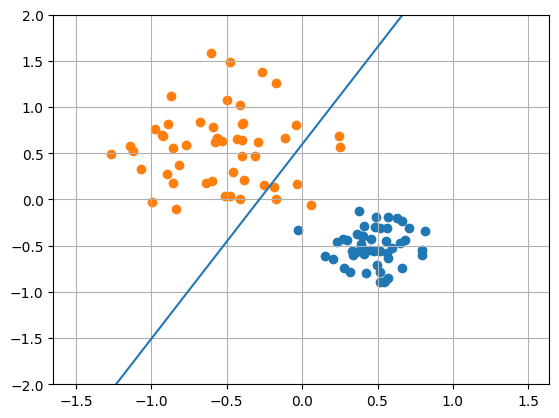

Epoch 1: Average loss = 0.6008, Accuracy = 96.00%


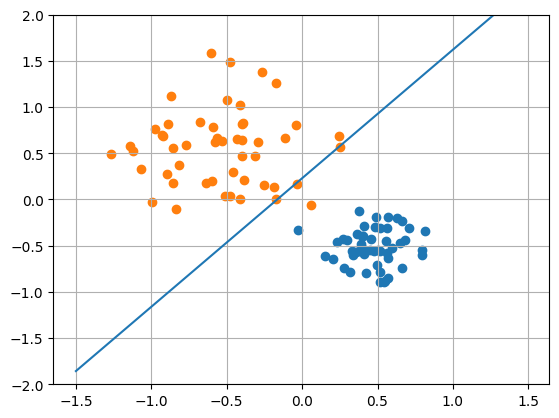

Epoch 2: Average loss = 0.3468, Accuracy = 98.00%


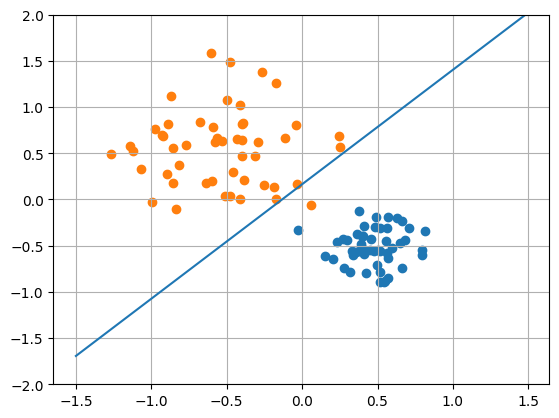

Epoch 3: Average loss = 0.2203, Accuracy = 99.00%


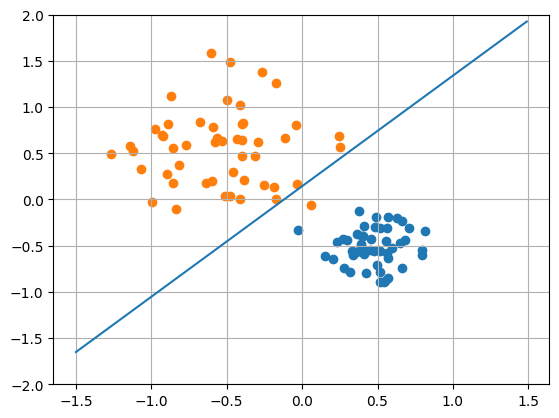

Epoch 4: Average loss = 0.1642, Accuracy = 99.00%


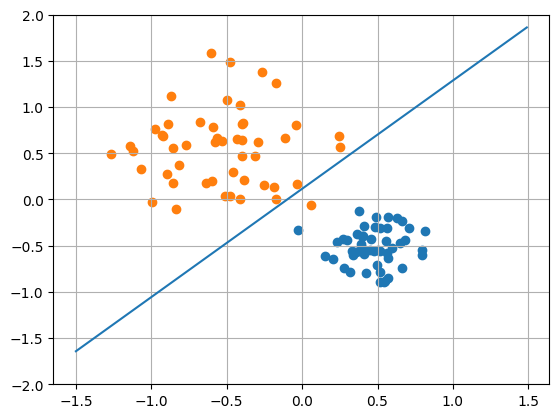

Epoch 5: Average loss = 0.1350, Accuracy = 99.00%


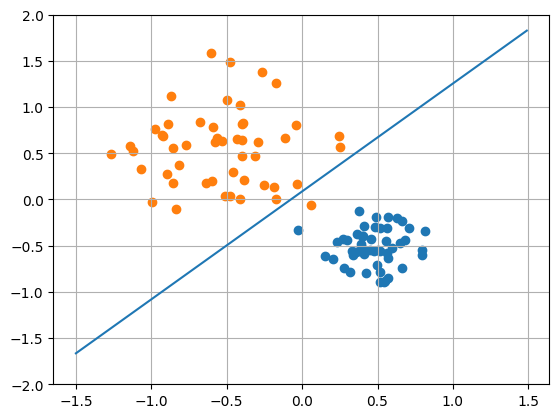

Epoch 6: Average loss = 0.1187, Accuracy = 99.00%


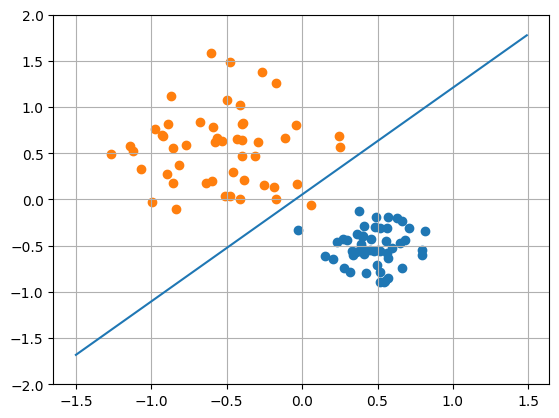

Epoch 7: Average loss = 0.1060, Accuracy = 99.00%


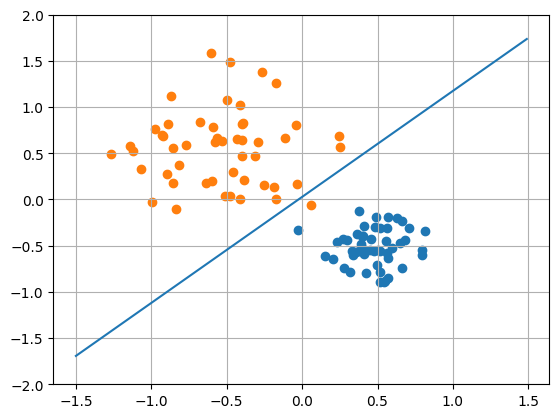

Epoch 8: Average loss = 0.0938, Accuracy = 99.00%


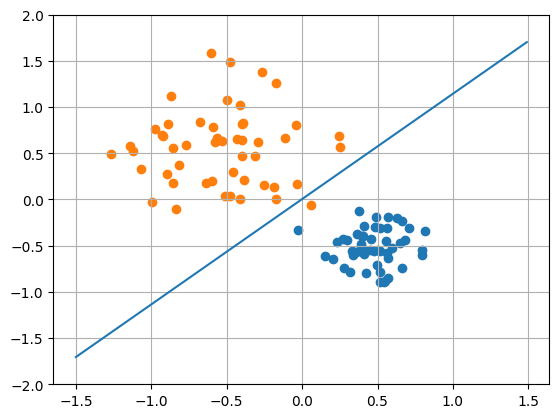

Epoch 9: Average loss = 0.0849, Accuracy = 99.00%


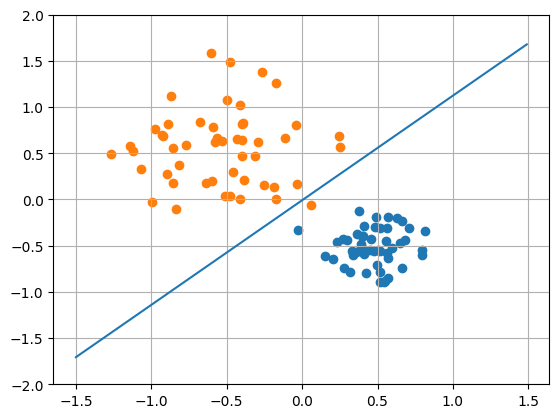

Epoch 10: Average loss = 0.0786, Accuracy = 99.00%


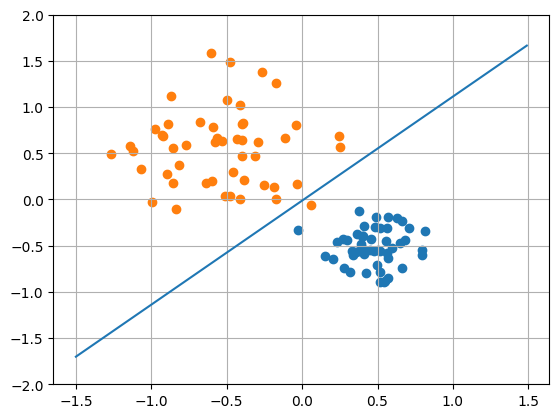

Epoch 11: Average loss = 0.0749, Accuracy = 99.00%


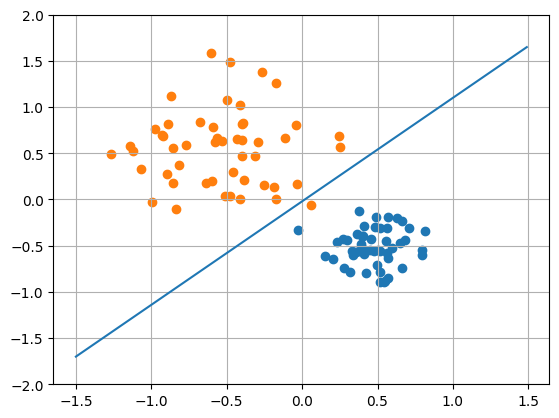

Epoch 12: Average loss = 0.0724, Accuracy = 99.00%


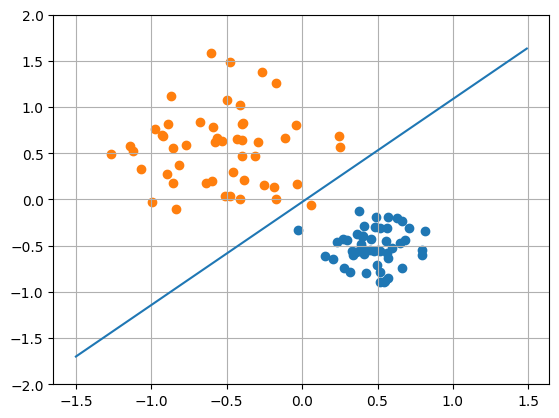

Epoch 13: Average loss = 0.0698, Accuracy = 99.00%


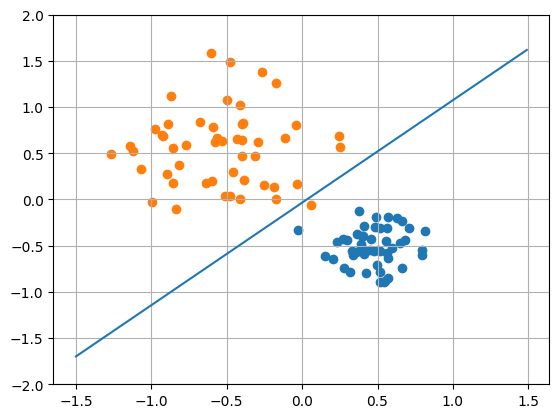

Epoch 14: Average loss = 0.0673, Accuracy = 99.00%


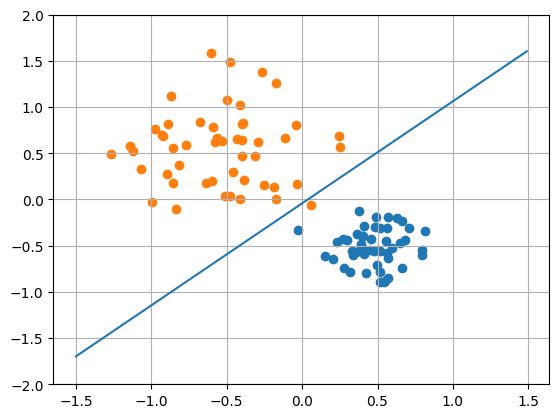

Epoch 15: Average loss = 0.0647, Accuracy = 99.00%


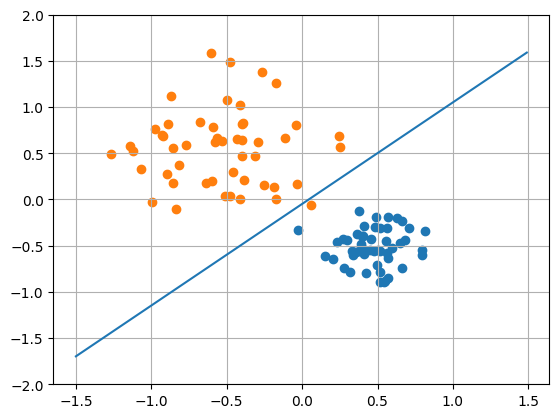

Epoch 16: Average loss = 0.0622, Accuracy = 99.00%


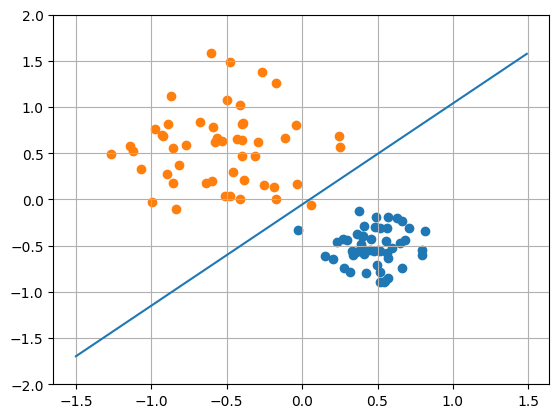

Epoch 17: Average loss = 0.0596, Accuracy = 99.00%


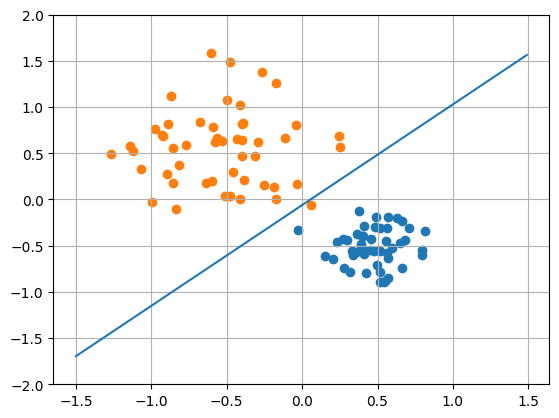

Epoch 18: Average loss = 0.0572, Accuracy = 99.00%


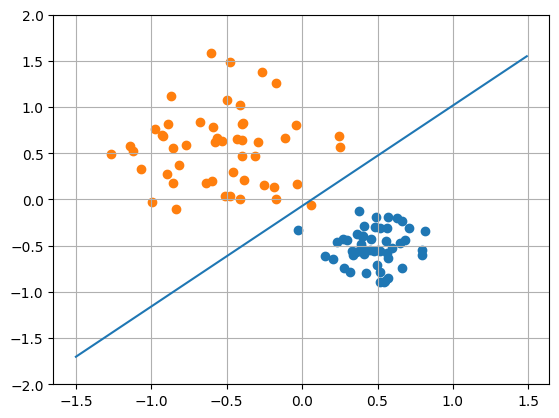

Epoch 19: Average loss = 0.0548, Accuracy = 99.00%


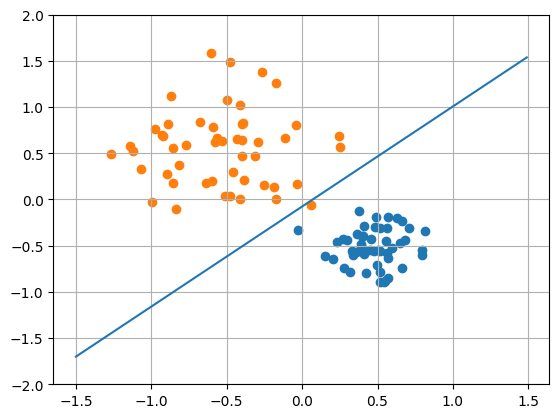

Epoch 20: Average loss = 0.0530, Accuracy = 99.00%


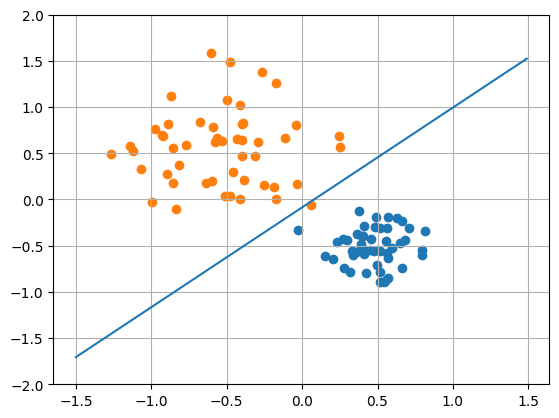

Epoch 21: Average loss = 0.0511, Accuracy = 99.00%


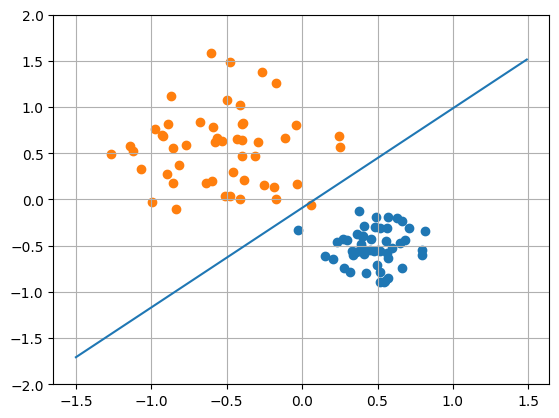

Epoch 22: Average loss = 0.0495, Accuracy = 99.00%


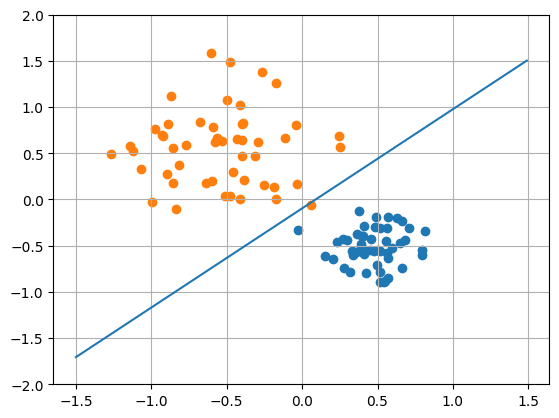

Epoch 23: Average loss = 0.0480, Accuracy = 99.00%


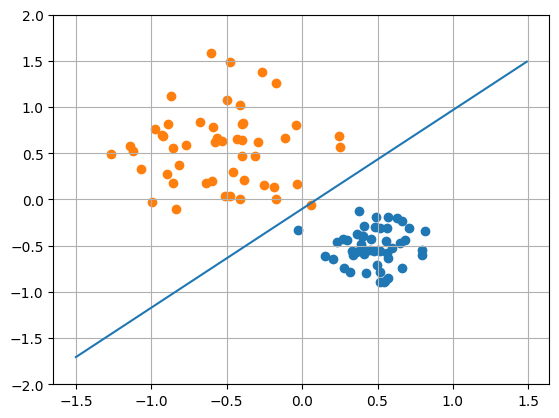

Epoch 24: Average loss = 0.0467, Accuracy = 99.00%


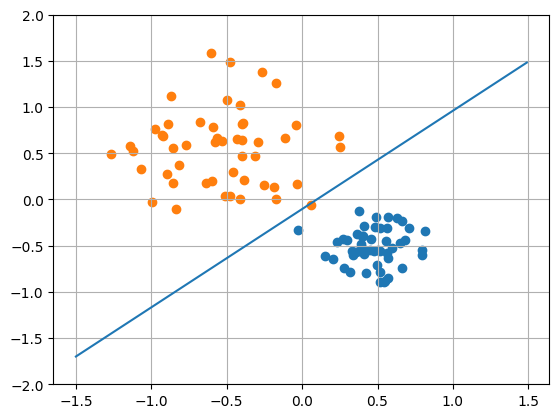

Epoch 25: Average loss = 0.0456, Accuracy = 99.00%


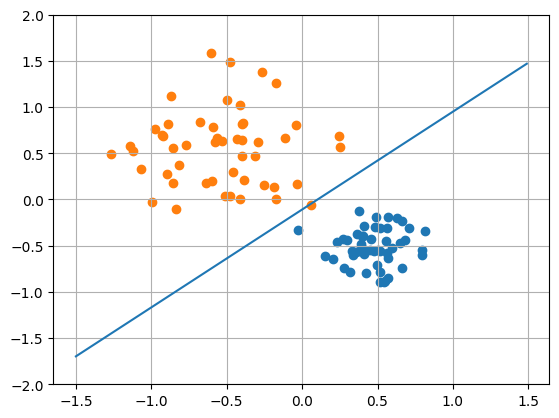

Epoch 26: Average loss = 0.0445, Accuracy = 99.00%


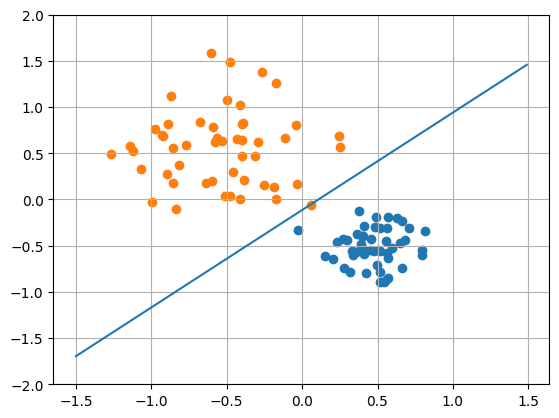

Epoch 27: Average loss = 0.0434, Accuracy = 99.00%


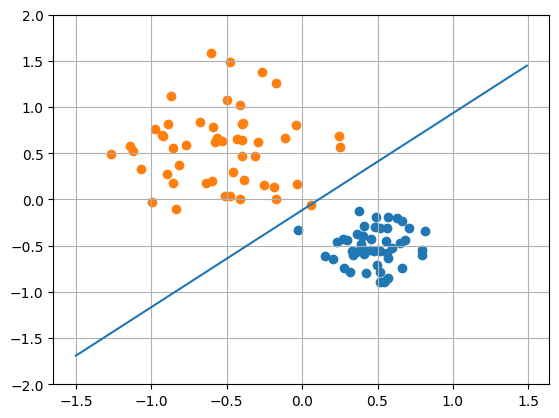

Epoch 28: Average loss = 0.0423, Accuracy = 99.00%


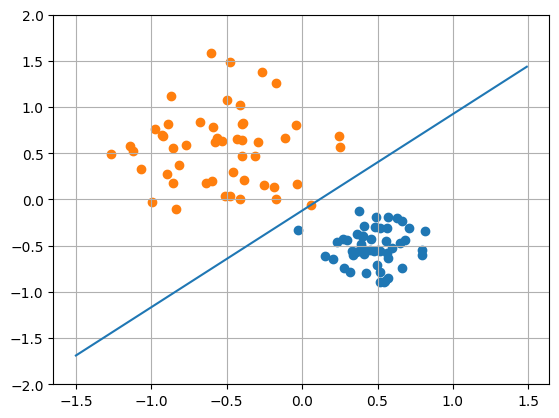

Epoch 29: Average loss = 0.0413, Accuracy = 99.00%


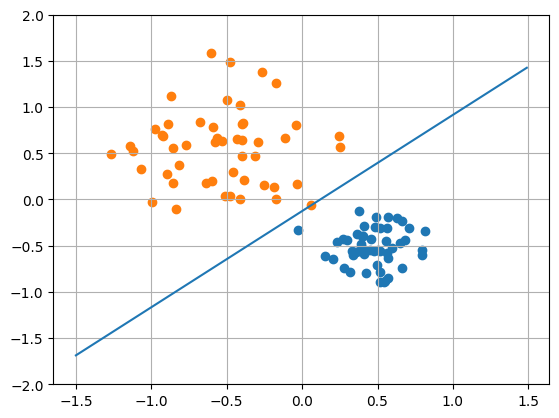

Epoch 30: Average loss = 0.0402, Accuracy = 100.00%


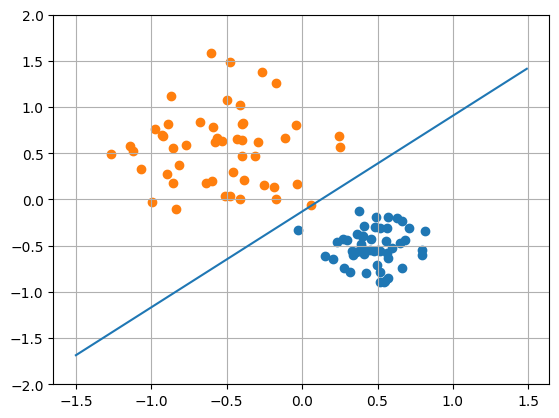

Epoch 31: Average loss = 0.0391, Accuracy = 100.00%


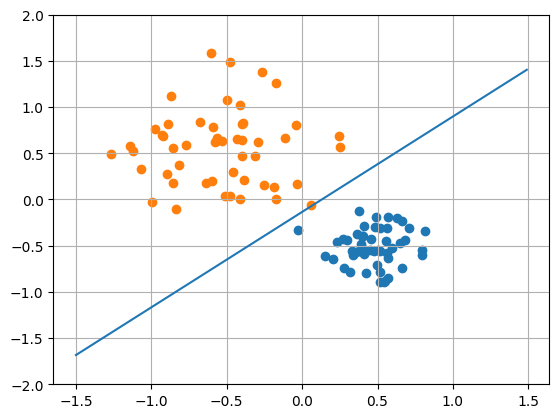

Epoch 32: Average loss = 0.0381, Accuracy = 100.00%


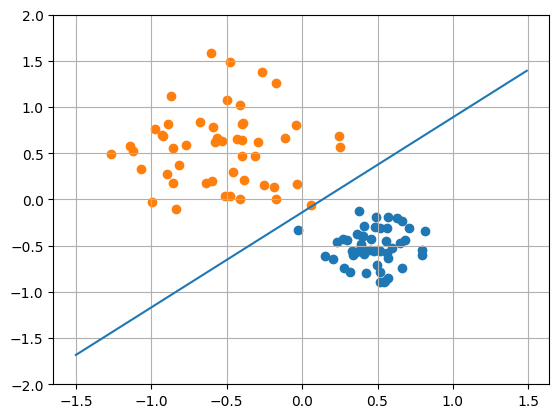

Epoch 33: Average loss = 0.0370, Accuracy = 100.00%


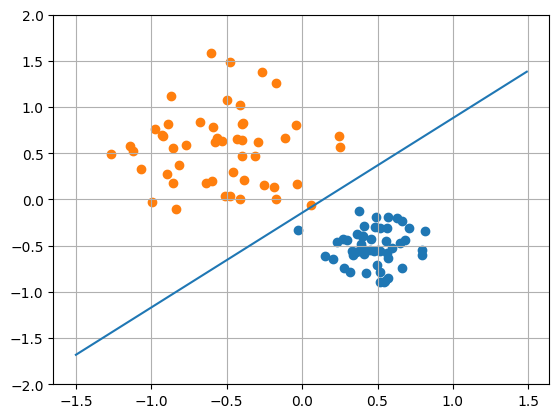

Epoch 34: Average loss = 0.0359, Accuracy = 100.00%


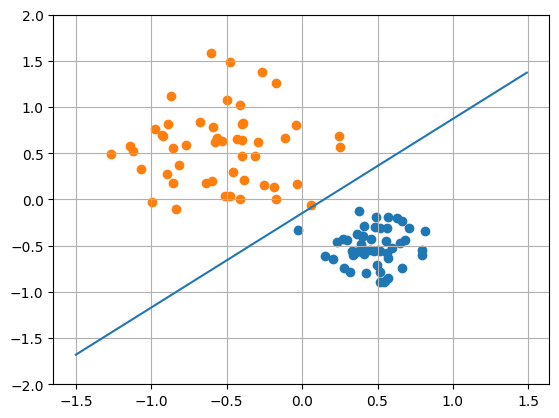

Epoch 35: Average loss = 0.0351, Accuracy = 100.00%


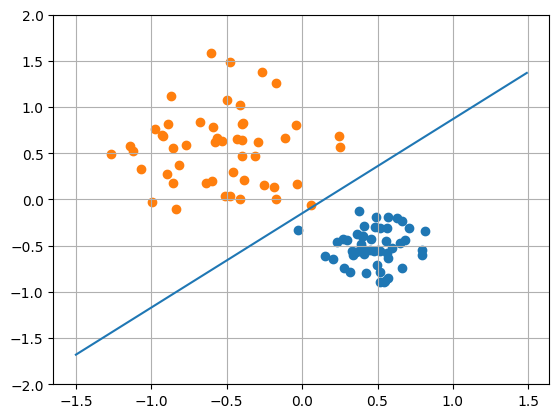

Epoch 36: Average loss = 0.0343, Accuracy = 100.00%


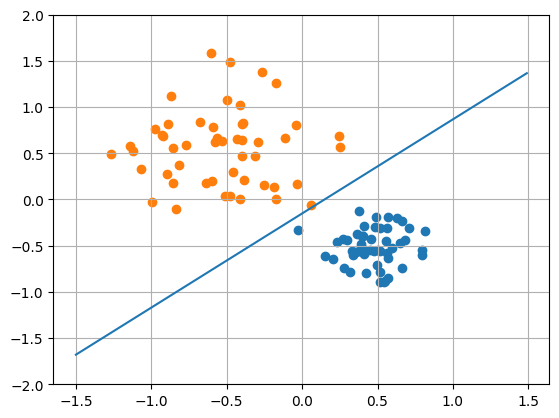

Epoch 37: Average loss = 0.0337, Accuracy = 100.00%


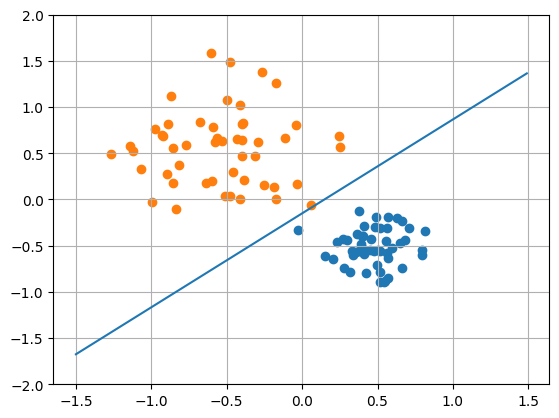

Epoch 38: Average loss = 0.0331, Accuracy = 100.00%


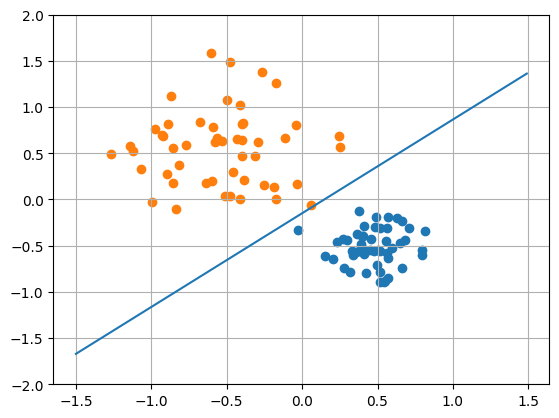

Epoch 39: Average loss = 0.0325, Accuracy = 100.00%


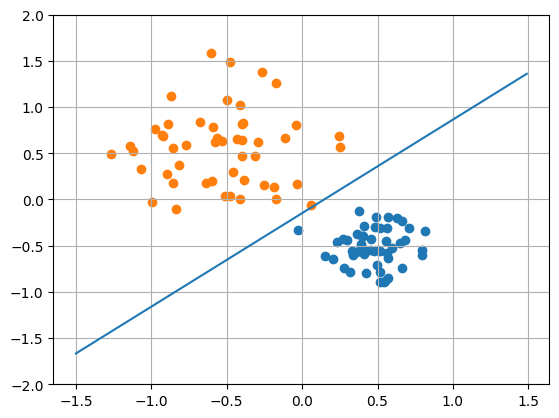

Epoch 40: Average loss = 0.0318, Accuracy = 100.00%


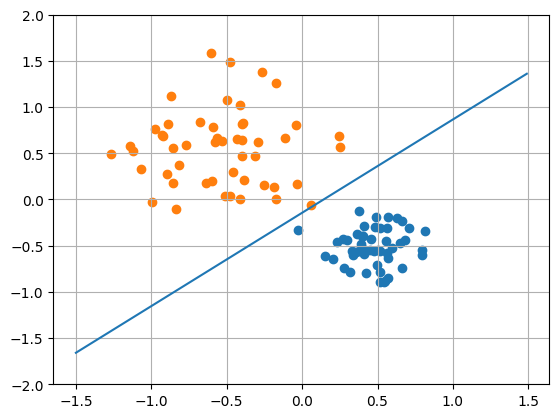

Epoch 41: Average loss = 0.0314, Accuracy = 100.00%


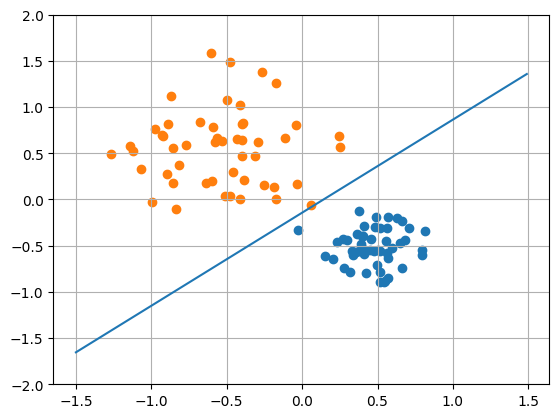

Epoch 42: Average loss = 0.0310, Accuracy = 100.00%


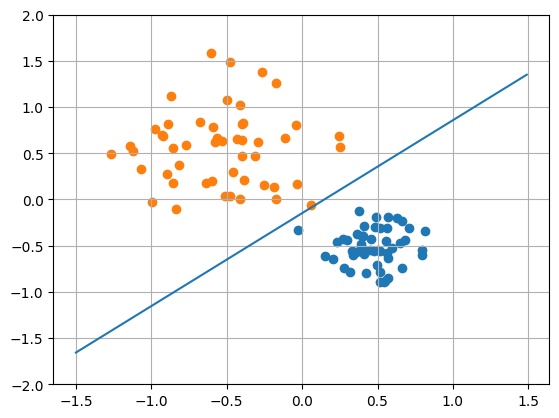

Epoch 43: Average loss = 0.0307, Accuracy = 100.00%


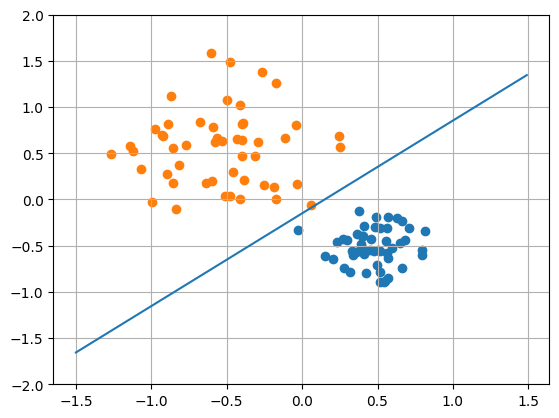

Epoch 44: Average loss = 0.0304, Accuracy = 100.00%


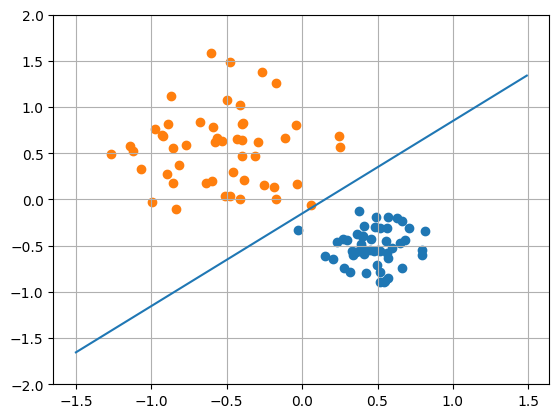

Epoch 45: Average loss = 0.0301, Accuracy = 100.00%


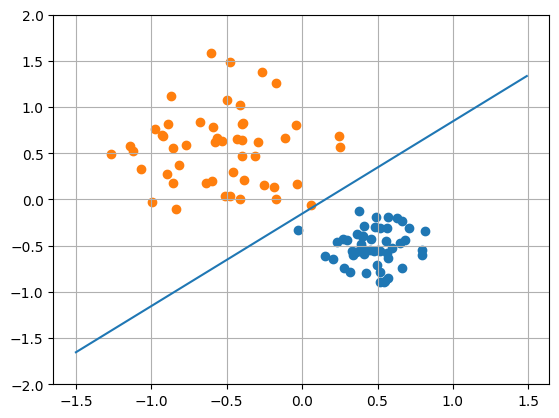

Epoch 46: Average loss = 0.0298, Accuracy = 100.00%


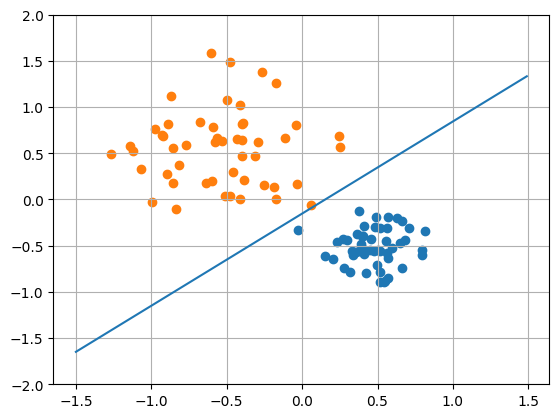

Epoch 47: Average loss = 0.0296, Accuracy = 100.00%


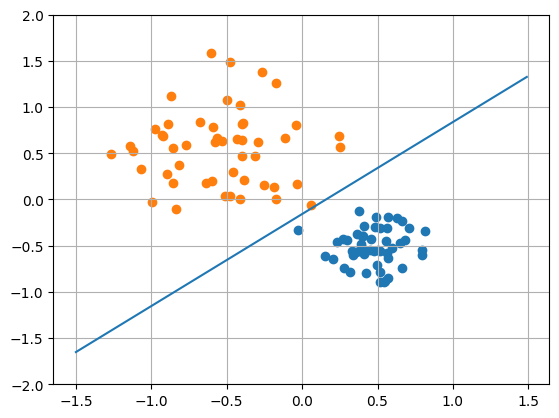

Epoch 48: Average loss = 0.0292, Accuracy = 100.00%


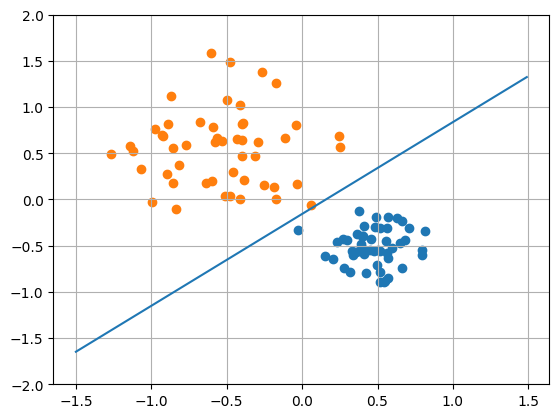

Epoch 49: Average loss = 0.0290, Accuracy = 100.00%


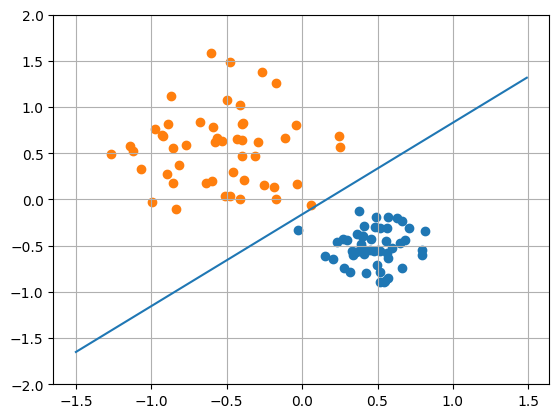

Best accuracy over all epochs: 100.00%


In [46]:
n_epoch = 50  # Increased from 20 to 50 epochs for more iterations
w = [0.1, 0.1]
b = 0.1
learning_rate = 5e-3  # Adjusted learning rate for potentially faster convergence
accuracy_history = []  # Track accuracy after each epoch

for epoch in range(n_epoch):
    loss_values = []
    shuffled_index = np.arange(len(X))
    np.random.shuffle(shuffled_index)
    correct_predictions = 0

    for i in shuffled_index:
        # Random point
        x, y = X[i], Y[i]

        # Compute predicted output using affine transformation
        o_pred = affine(w, b, x)
        
        # Convert label y from {0, 1} to {-1, 1} for hinge loss calculation
        y_transformed = 2 * y - 1

        # Compute loss using the hinge_loss function
        loss = hinge_loss(o_pred, y_transformed)
        
        loss_values.append(loss)
        
        # Compute the derivative of the hinge loss with respect to the predicted output
        loss_grad = hinge_loss_grad(o_pred, y_transformed)
        
        # Compute gradients of w and b using the affine_grad function
        grad_w_affine, grad_b_affine = affine_grad(w, b, x)

        # Update gradients based on the loss gradient
        w_grad = grad_w_affine * loss_grad
        b_grad = grad_b_affine * loss_grad

        # Update w and b according to the gradients
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
    
        # Make prediction for accuracy calculation
        predicted_class = 1 if o_pred >= 0 else 0
        if predicted_class == y:
            correct_predictions += 1

    # Compute accuracy for the current epoch
    epoch_accuracy = correct_predictions / len(X)
    accuracy_history.append(epoch_accuracy)
    
    # Print average loss and accuracy for the current epoch
    avg_loss = np.mean(loss_values)
    print(f"Epoch {epoch}: Average loss = {avg_loss:.4f}, Accuracy = {epoch_accuracy * 100:.2f}%")

    loss_values = []

    c, d = line_param(w, b)
    
    plt.scatter(X[Y==1][:, 0],X[Y==1][:, 1])
    plt.scatter(X[Y==0][:, 0],X[Y==0][:, 1])
    plt.grid()
    rrange = np.arange(-1.5, 1.5, 0.01)
    plt.plot(rrange, rrange * c + d)
    plt.ylim([-2, 2])
    
    plt.show()


# Find the best accuracy over all epochs
best_accuracy = max(accuracy_history)
print(f"Best accuracy over all epochs: {best_accuracy * 100:.2f}%")

## 3. Non linearly separable problem

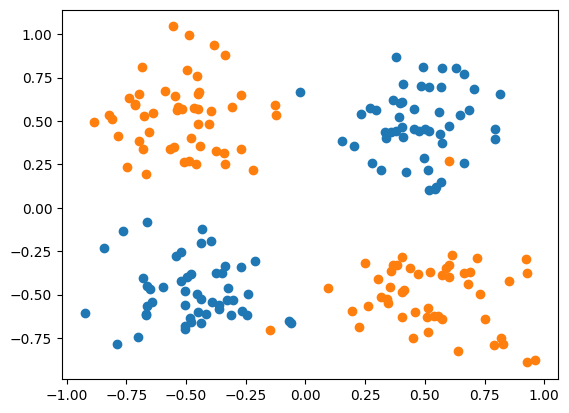

In [47]:
np.random.seed(42)
dataset = list(zip(np.random.randn(50,2)*0.2 + [0.5, 0.5], np.ones(50))) \
               + list(zip(np.random.randn(50,2)*0.2 + [-0.5, 0.5], np.zeros(50)))\
               + list(zip(np.random.randn(50,2)*0.2 + [0.5, -0.5], np.zeros(50))) \
               +  list(zip(np.random.randn(50,2)*0.2 + [-0.5, -0.5], np.ones(50)))
X, Y = np.array([x for (x, _) in dataset]), np.array([y for (_, y) in dataset]) 

plt.scatter(X[Y==1][:, 0],X[Y==1][:, 1])
plt.scatter(X[Y==0][:, 0],X[Y==0][:, 1])

**Question 1**: Train a linear classifier on this dataset and reports the results. Without manually transform the data explain what architecture could solve this problem

Epoch 0: Average loss = 1.0047, Accuracy = 38.50%


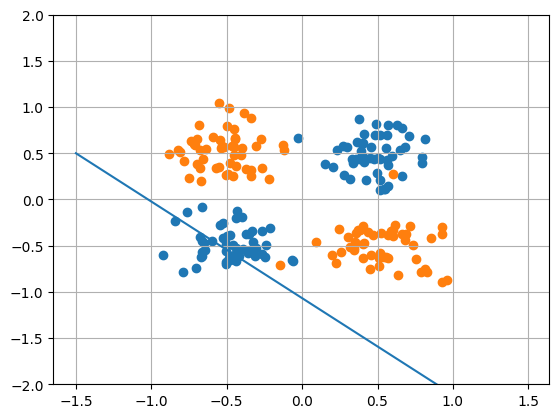

Epoch 1: Average loss = 1.0047, Accuracy = 38.00%


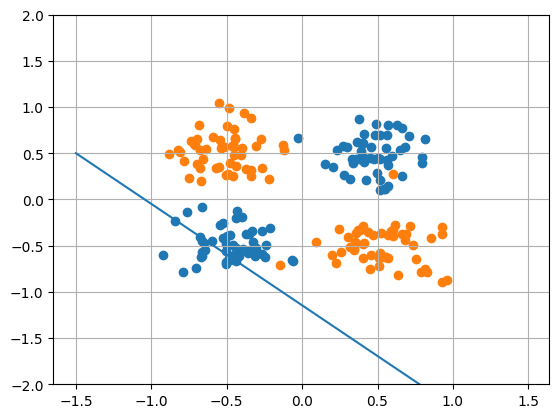

Epoch 2: Average loss = 1.0047, Accuracy = 45.00%


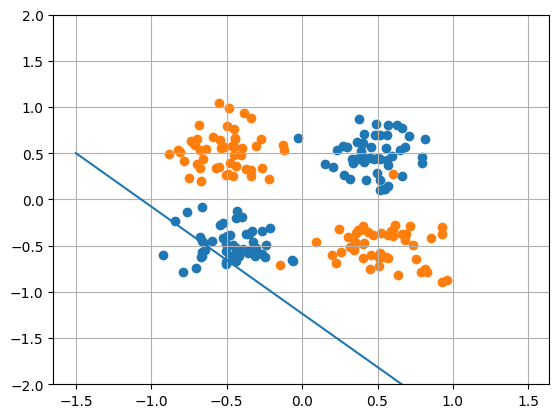

Epoch 3: Average loss = 1.0046, Accuracy = 48.00%


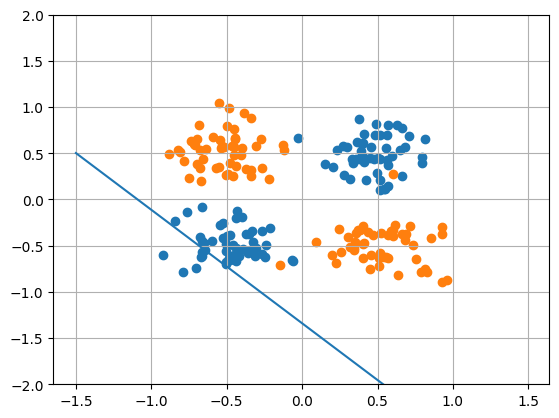

Epoch 4: Average loss = 1.0046, Accuracy = 46.00%


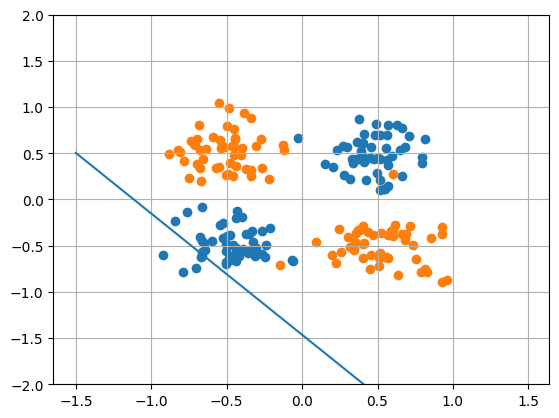

Epoch 5: Average loss = 1.0045, Accuracy = 33.50%


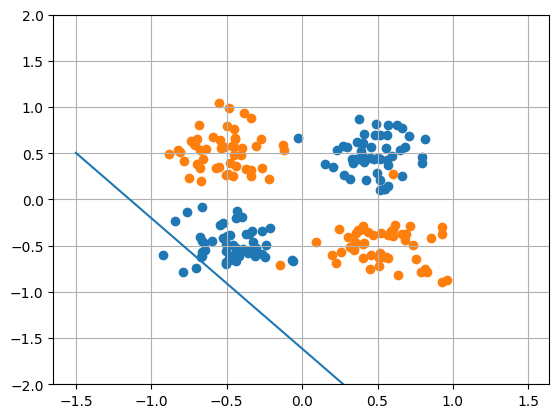

Epoch 6: Average loss = 1.0045, Accuracy = 41.50%


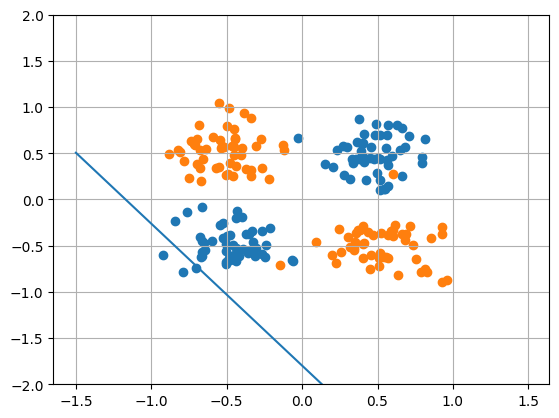

Epoch 7: Average loss = 1.0044, Accuracy = 47.00%


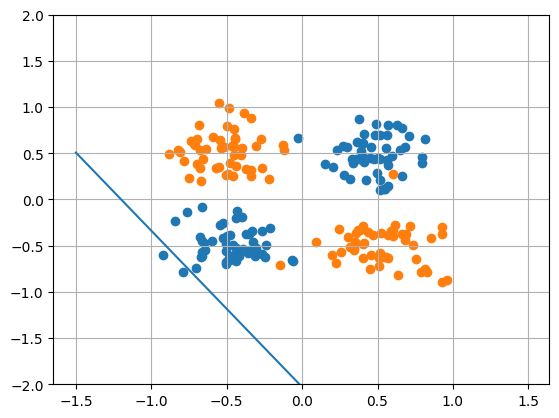

Epoch 8: Average loss = 1.0044, Accuracy = 47.50%


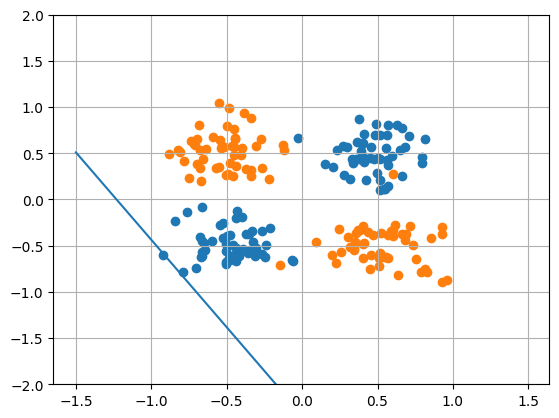

Epoch 9: Average loss = 1.0043, Accuracy = 50.00%


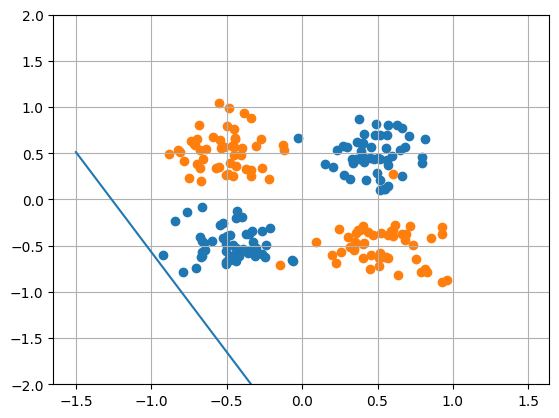

Epoch 10: Average loss = 1.0043, Accuracy = 50.00%


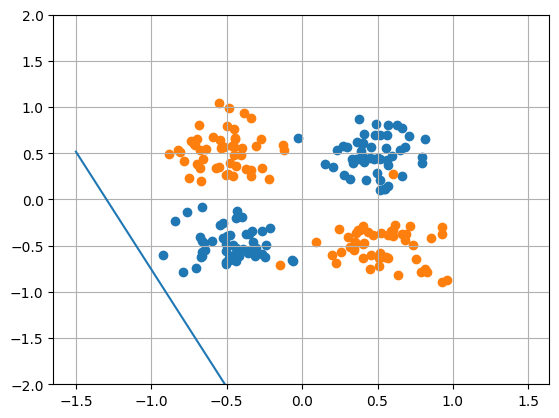

Epoch 11: Average loss = 1.0043, Accuracy = 48.00%


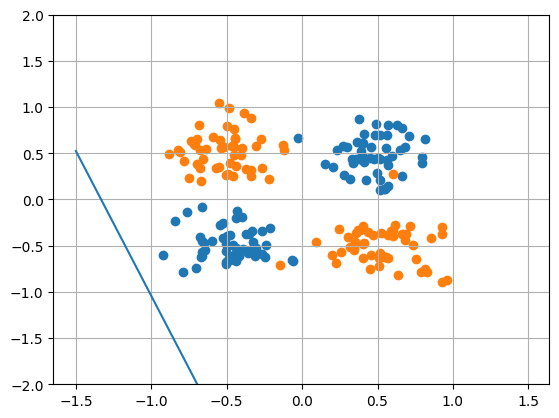

Epoch 12: Average loss = 1.0042, Accuracy = 47.00%


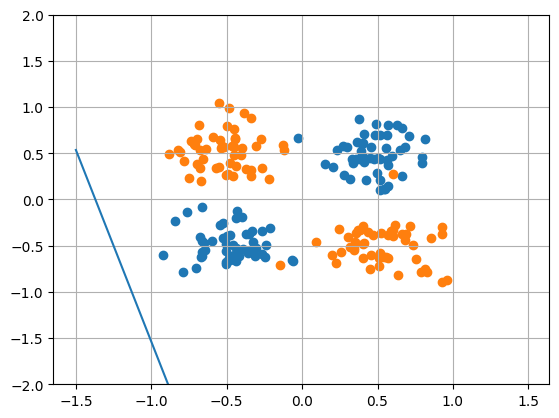

Epoch 13: Average loss = 1.0042, Accuracy = 47.50%


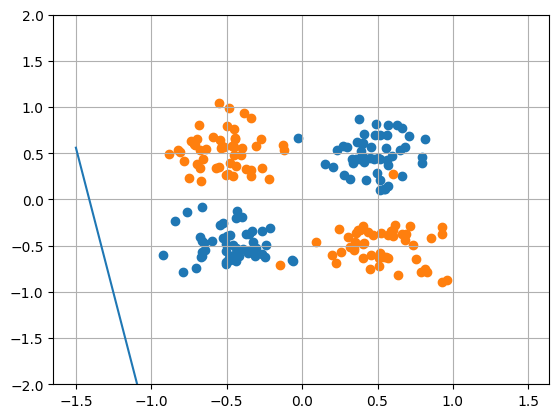

Epoch 14: Average loss = 1.0041, Accuracy = 50.00%


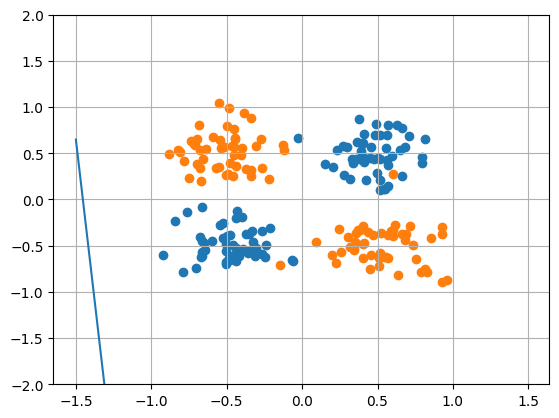

Epoch 15: Average loss = 1.0041, Accuracy = 53.50%


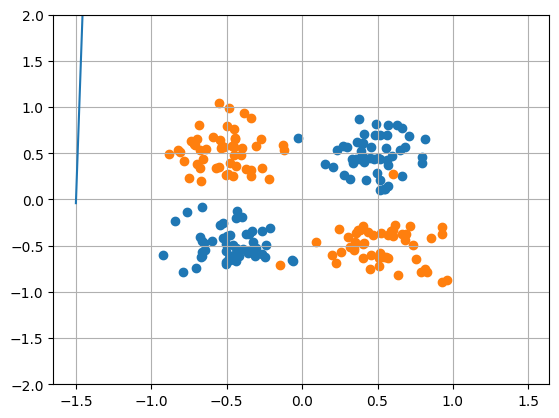

Epoch 16: Average loss = 1.0040, Accuracy = 50.00%


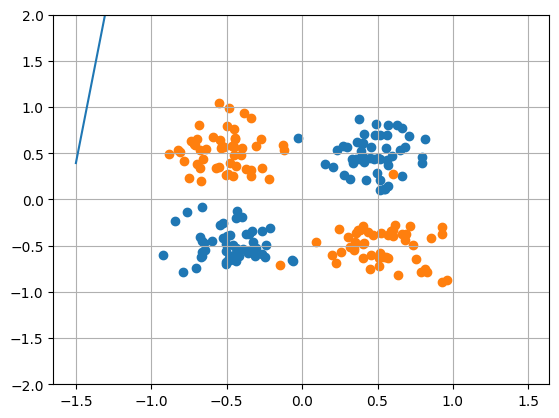

Epoch 17: Average loss = 1.0040, Accuracy = 50.50%


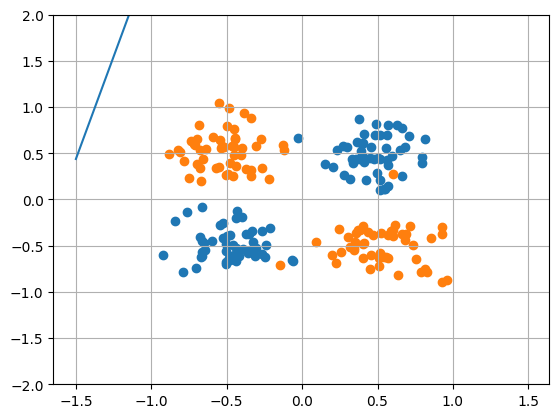

Epoch 18: Average loss = 1.0039, Accuracy = 50.00%


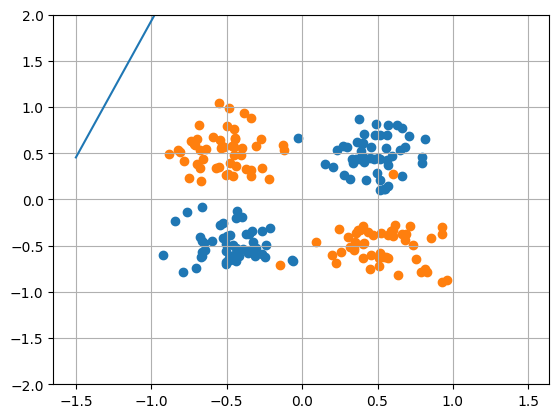

Epoch 19: Average loss = 1.0039, Accuracy = 50.00%


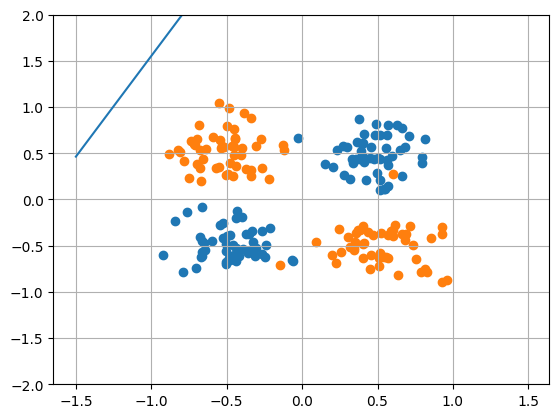

Epoch 20: Average loss = 1.0039, Accuracy = 50.00%


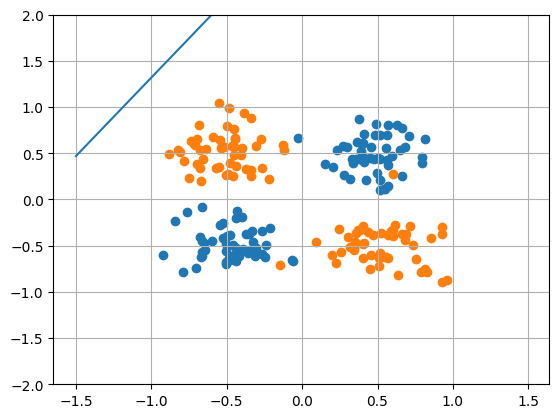

Epoch 21: Average loss = 1.0038, Accuracy = 50.00%


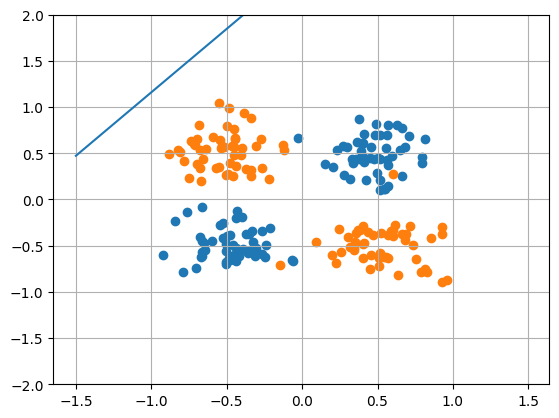

Epoch 22: Average loss = 1.0038, Accuracy = 50.00%


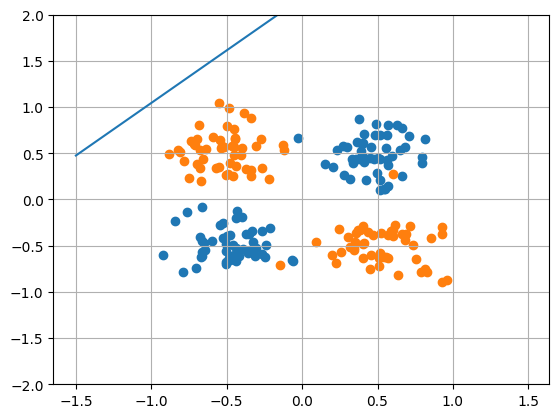

Epoch 23: Average loss = 1.0037, Accuracy = 50.00%


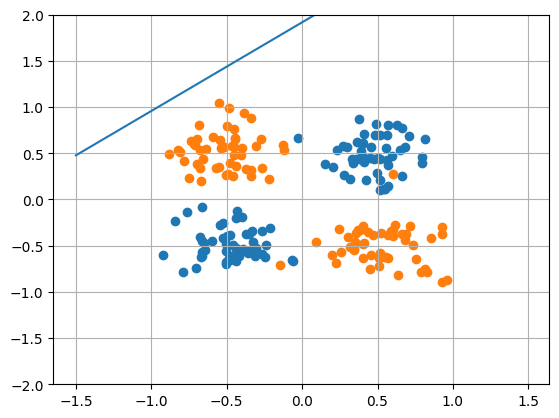

Epoch 24: Average loss = 1.0037, Accuracy = 50.00%


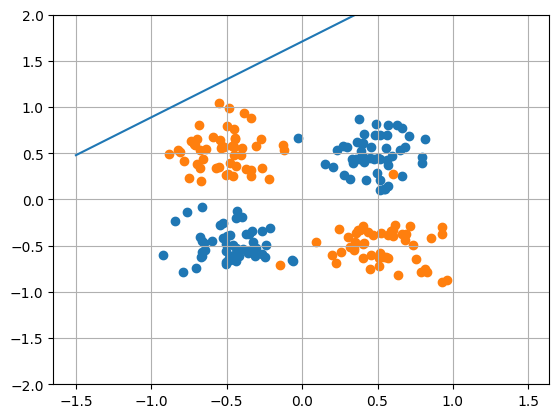

Epoch 25: Average loss = 1.0036, Accuracy = 52.50%


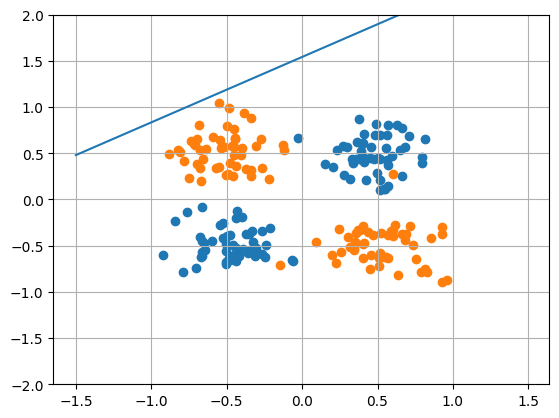

Epoch 26: Average loss = 1.0036, Accuracy = 50.00%


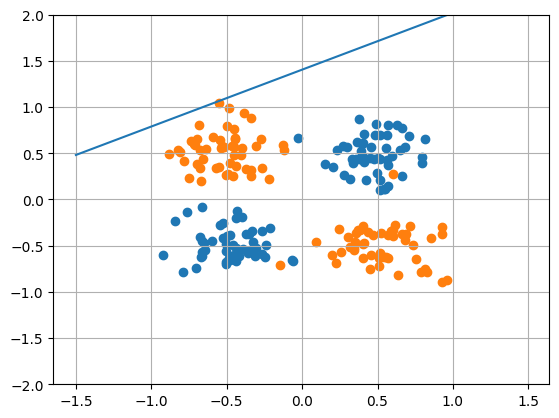

Epoch 27: Average loss = 1.0035, Accuracy = 51.00%


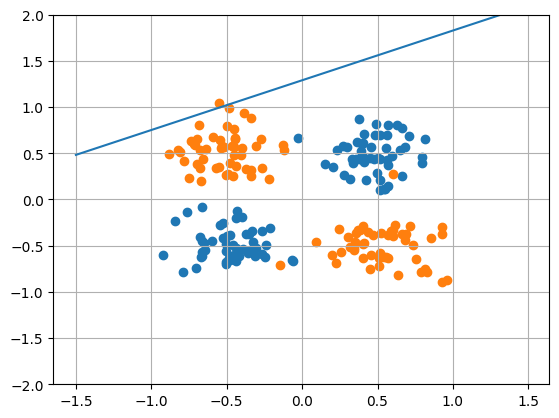

Epoch 28: Average loss = 1.0035, Accuracy = 56.00%


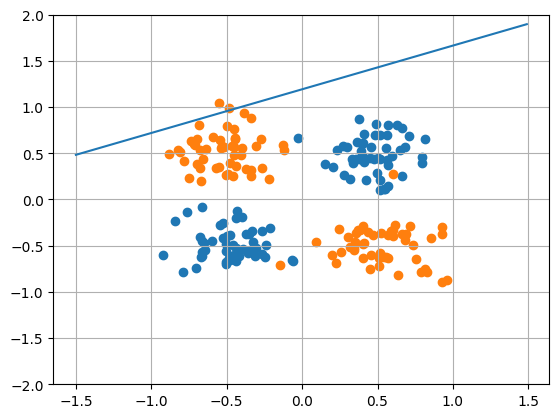

Epoch 29: Average loss = 1.0035, Accuracy = 55.00%


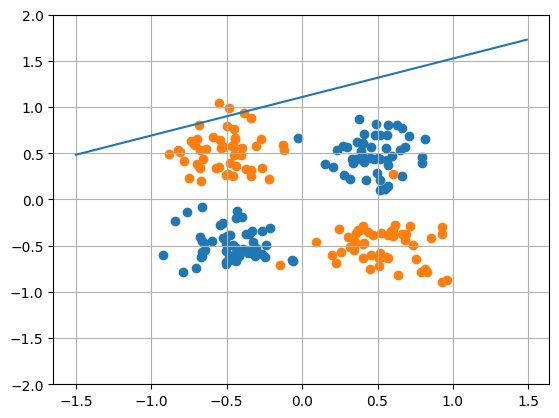

Epoch 30: Average loss = 1.0034, Accuracy = 51.50%


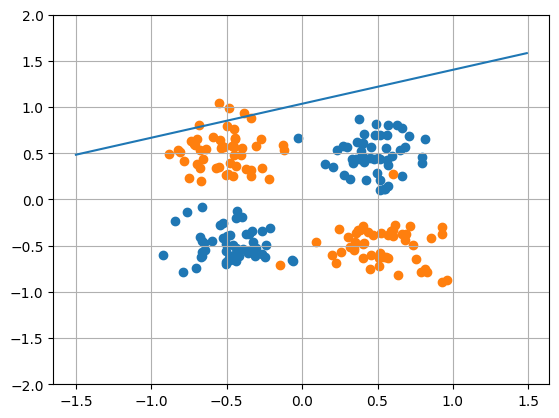

Epoch 31: Average loss = 1.0034, Accuracy = 53.00%


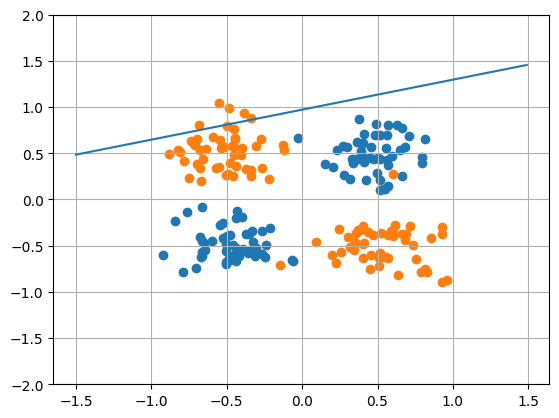

Epoch 32: Average loss = 1.0033, Accuracy = 53.50%


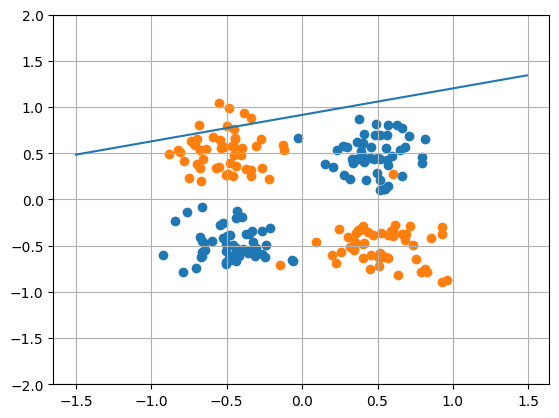

Epoch 33: Average loss = 1.0033, Accuracy = 51.00%


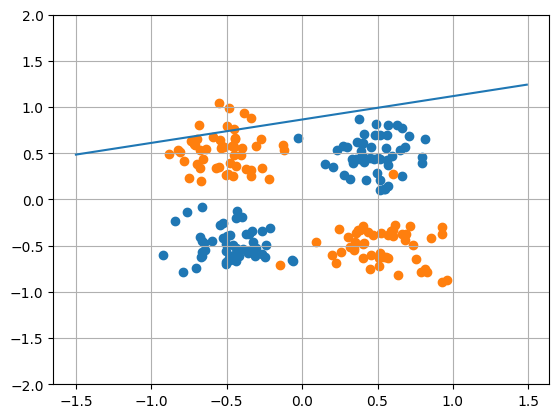

Epoch 34: Average loss = 1.0032, Accuracy = 54.00%


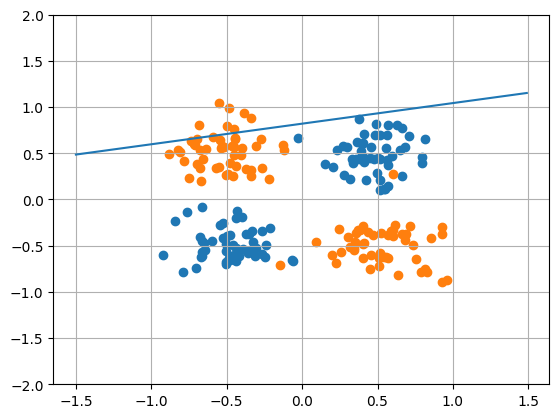

Epoch 35: Average loss = 1.0032, Accuracy = 53.50%


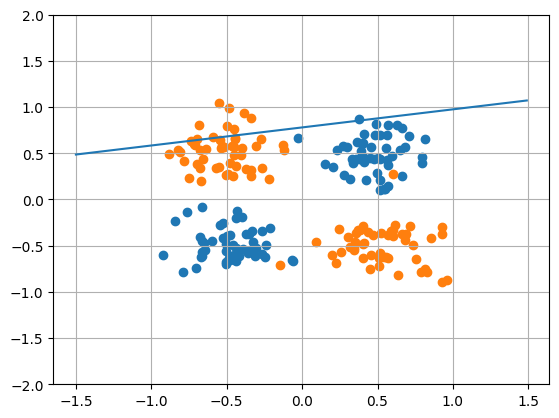

Epoch 36: Average loss = 1.0031, Accuracy = 53.00%


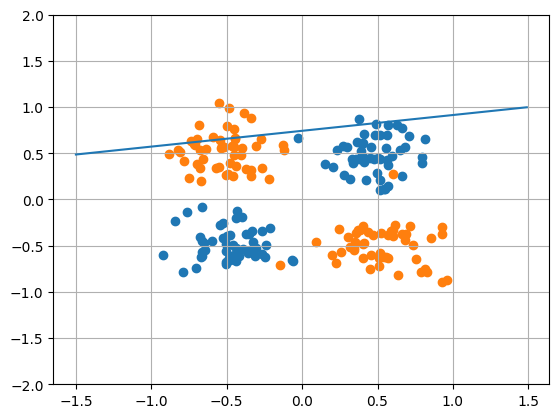

Epoch 37: Average loss = 1.0031, Accuracy = 51.00%


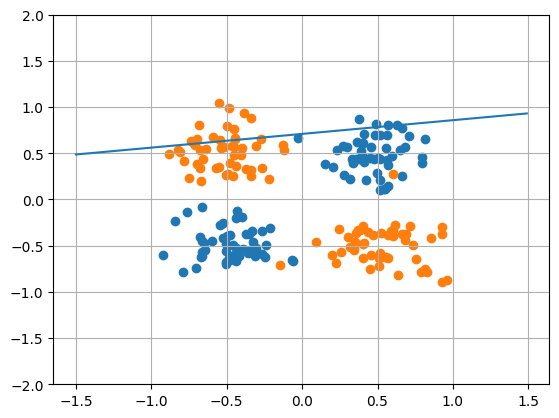

Epoch 38: Average loss = 1.0031, Accuracy = 56.50%


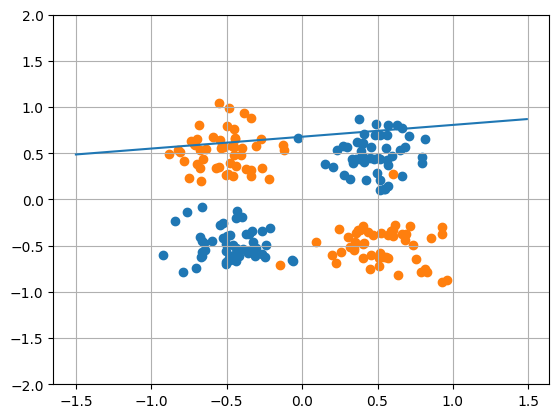

Epoch 39: Average loss = 1.0030, Accuracy = 51.00%


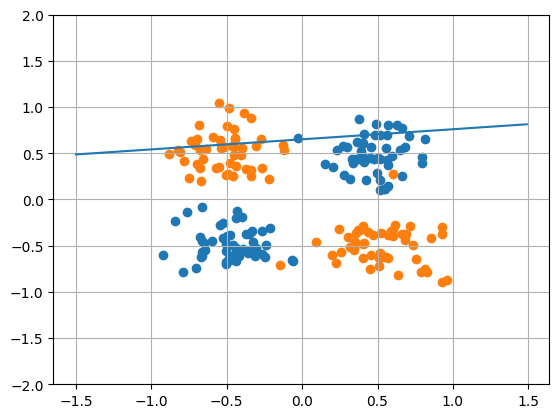

Epoch 40: Average loss = 1.0030, Accuracy = 58.00%


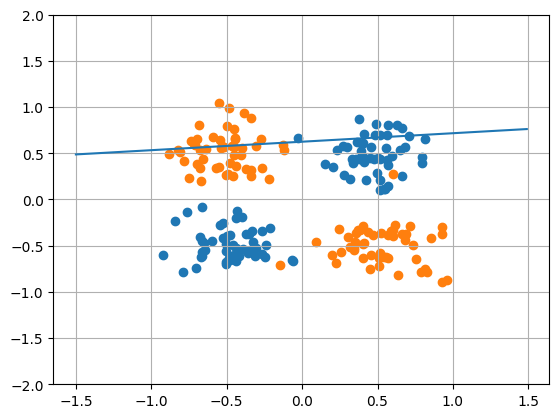

Epoch 41: Average loss = 1.0029, Accuracy = 54.50%


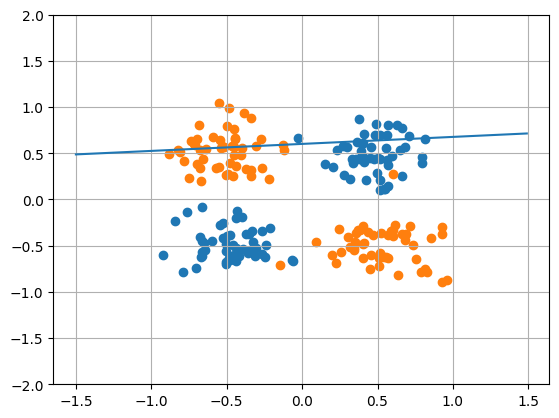

Epoch 42: Average loss = 1.0029, Accuracy = 49.00%


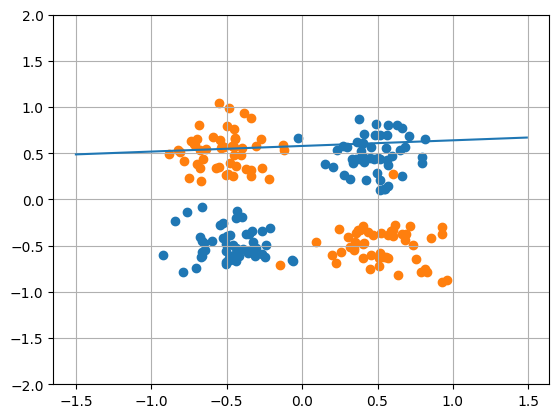

Epoch 43: Average loss = 1.0028, Accuracy = 50.00%


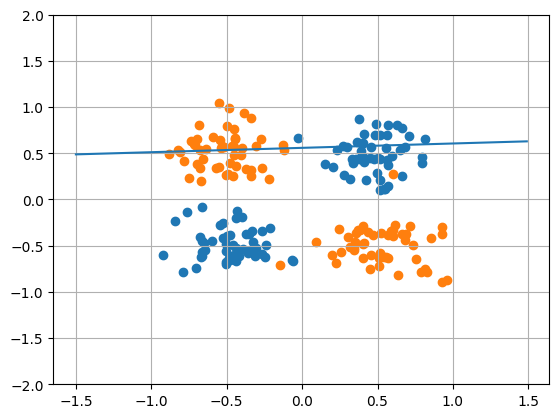

Epoch 44: Average loss = 1.0028, Accuracy = 48.50%


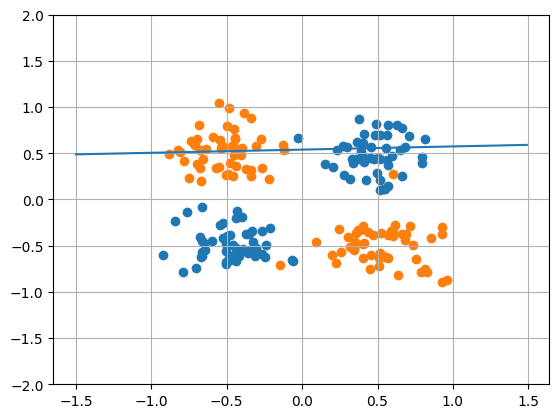

Epoch 45: Average loss = 1.0027, Accuracy = 49.00%


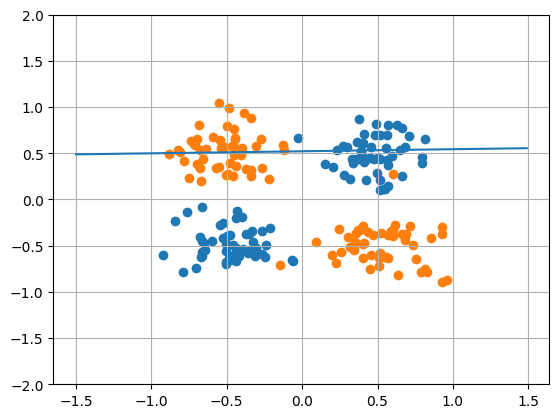

Epoch 46: Average loss = 1.0027, Accuracy = 51.00%


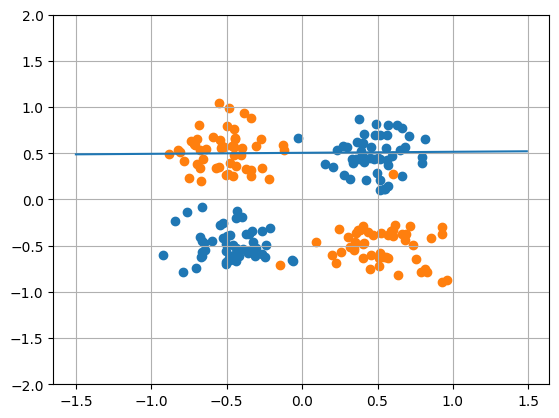

Epoch 47: Average loss = 1.0027, Accuracy = 48.50%


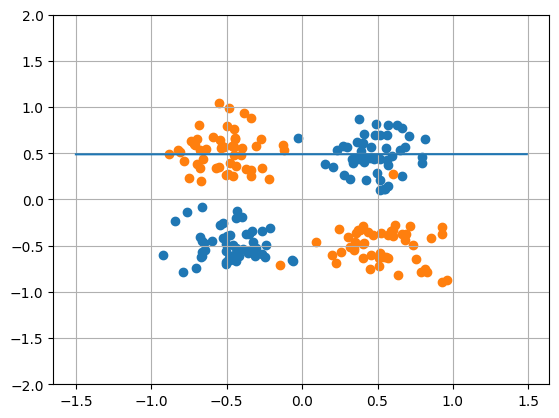

Epoch 48: Average loss = 1.0026, Accuracy = 51.50%


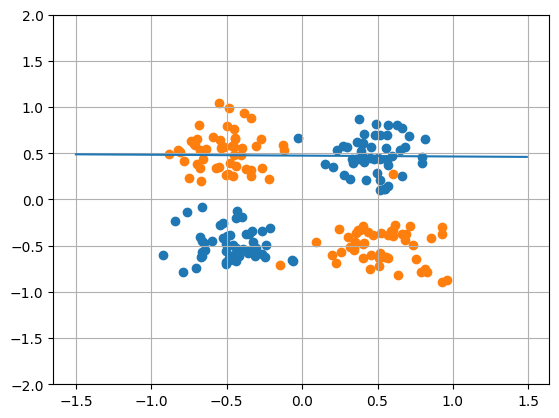

Epoch 49: Average loss = 1.0026, Accuracy = 48.50%


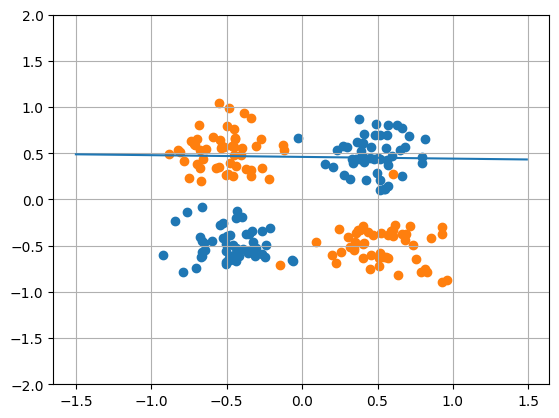

Best accuracy over all epochs: 58.00%


In [48]:
n_epoch = 50  # Increased from 20 to 50 epochs for more iterations
w = [0.1, 0.1]
b = 0.1
learning_rate = 5e-3  # Adjusted learning rate for potentially faster convergence
accuracy_history = []  # Track accuracy after each epoch

for epoch in range(n_epoch):
    loss_values = []
    shuffled_index = np.arange(len(X))
    np.random.shuffle(shuffled_index)
    correct_predictions = 0

    for i in shuffled_index:
        # Random point
        x, y = X[i], Y[i]

        # Compute predicted output using affine transformation
        o_pred = affine(w, b, x)
        
        # Convert label y from {0, 1} to {-1, 1} for hinge loss calculation
        y_transformed = 2 * y - 1

        # Compute loss using the hinge_loss function
        loss = hinge_loss(o_pred, y_transformed)
        
        loss_values.append(loss)
        
        # Compute the derivative of the hinge loss with respect to the predicted output
        loss_grad = hinge_loss_grad(o_pred, y_transformed)
        
        # Compute gradients of w and b using the affine_grad function
        grad_w_affine, grad_b_affine = affine_grad(w, b, x)

        # Update gradients based on the loss gradient
        w_grad = grad_w_affine * loss_grad
        b_grad = grad_b_affine * loss_grad

        # Update w and b according to the gradients
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
    
        # Make prediction for accuracy calculation
        predicted_class = 1 if o_pred >= 0 else 0
        if predicted_class == y:
            correct_predictions += 1

    # Compute accuracy for the current epoch
    epoch_accuracy = correct_predictions / len(X)
    accuracy_history.append(epoch_accuracy)
    
    # Print average loss and accuracy for the current epoch
    avg_loss = np.mean(loss_values)
    print(f"Epoch {epoch}: Average loss = {avg_loss:.4f}, Accuracy = {epoch_accuracy * 100:.2f}%")

    loss_values = []

    c, d = line_param(w, b)
    
    plt.scatter(X[Y==1][:, 0],X[Y==1][:, 1])
    plt.scatter(X[Y==0][:, 0],X[Y==0][:, 1])
    plt.grid()
    rrange = np.arange(-1.5, 1.5, 0.01)
    plt.plot(rrange, rrange * c + d)
    plt.ylim([-2, 2])
    
    plt.show()


# Find the best accuracy over all epochs
best_accuracy = max(accuracy_history)
print(f"Best accuracy over all epochs: {best_accuracy * 100:.2f}%")

The chosen dataset shows two distinct clusters of data points that are not linearly separable, which implies that a linear classifier may struggle to achieve high accuracy on this dataset.

In the scenario where a linear model isn't sufficient, here are some potential architectural changes or algorithmic strategies that could improve the classification results:

1. **Feature Engineering**: Constructing nonlinear features from the existing features (like polynomial features) could help a linear model to capture the nonlinearity in the data.

2. **Kernel Methods**: Using a kernelized version of SVM could allow the linear model to classify data in a higher-dimensional feature space where the classes might be linearly separable.

3. **Neural Networks**: A simple neural network with one or more hidden layers can learn complex decision boundaries. Even a single hidden layer with a non-linear activation function like ReLU or sigmoid can be sufficient.

4. **Decision Trees or Ensemble Methods**: These algorithms can naturally model non-linear relationships without the need for explicit feature transformation.

5. **Dimensionality Reduction**: Sometimes reducing the dimensionality of the data (e.g., with PCA) can also help to make patterns more apparent to a linear classifier, though it might not be applicable in this case with an already low-dimensional dataset.

- Given the nature of the data, it seems that adopting a method that can capture the circular pattern (like a neural network or a kernel method) would be a better fit. 

- A neural network with a small number of hidden neurons and a non-linear activation function would likely be able to learn the decision boundary that separates the two classes successfully.
